__Introduction__

Defining problem statement

Knowing house prices is very important to both a home buyer and seller. Because each party would want to get the best deal, the price cannot be too high or too low. The banks would also do due deligent in order not to finance an over valued house. It is therefore imperative for both a buyer and seller  to get an acceptable  appraisal for the house, which would be agreeable to all parties in the transaction. A number of factors affect home prices: the economy, the number of houses of similar kinds sold in the area in the recent past,and the features on the house. 

Having data from house sales at several communities would be vital in  building machine learning models that can predict house prices. This would apprise financial institutions as to when to send out offers for refinance for home owners, allow home sellers and buyers to have a good estimate of homes and so not to pay for home evaluations unless the banks demand one.


__Data Dictionary__

● cid: a notation for a house
   
● dayhours: Date house was sold

● price: Price is prediction target (in $)

● room_bed: Number of Bedrooms per house

● room_bath: Number of bathrooms per bedrooms

● living_measure: square footage of the home

● lot_measure: square footage of the lot

● ceil: Total floors (levels) in house

● coast: House which has a view to a waterfront (0 - No, 1 - Yes)

● sight: Has been viewed

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited. 1

● condition: How good the condition is (Overall out of 5)

● quality: grade given to the housing unit, based on grading system

● ceil_measure: square footage of house apart from basement

● basement_measure: square footage of the basement

● yr_built: Built Year

● yr_renovated: Year when house was renovated

● zipcode: zip code

● lat: Latitude coordinate

● long: Longitude coordinate

● living_measure15: Living room area in 2015 (implies-- some renovations) This might or might
not have affected the lot size area

● lot_measure15: lotSize area in 2015 (implies-- some renovations)

● furnished: Based on the quality of room (0 - No, 1 - Yes)

● total_area: Measure of both living and lot

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV



In [2]:
df = pd.read_excel("Dataset - House Price Prediction.xlsx")  # uploading data


In [3]:
df.sample(n = 10)  # Finding random 10 rows

cid         dayhours    price  room_bed  room_bath  \
1323   5418500650  20150325T000000   586000       4.0       2.25   
19927  2326059080  20140801T000000  1230000       3.0       2.50   
1505   3754501235  20141001T000000  1190000       3.0       2.50   
6072   2113700025  20150409T000000   330000       2.0       1.00   
17527  5420300240  20141205T000000   270000       3.0       1.75   
18590  4136880460  20140514T000000   316000       4.0       2.50   
18182    16000545  20150312T000000   250000       4.0       1.00   
11364  3971701300  20141220T000000   255000       2.0       1.00   
11535  1245001295  20140522T000000   648360       4.0       1.75   
7658   5423500240  20140624T000000   194000       3.0       1.00   

       living_measure  lot_measure ceil coast  sight  ... basement  yr_built  \
1323           1930.0       8338.0    1     0    0.0  ...      0.0      1968   
19927          3420.0      79279.0    2     0    0.0  ...      0.0      1990   
1505           2510.0       4600.0    2     0    2.0  ...      0.0      2006   
6072           1129.0       3840.0    1     0    0.0  ...      0.0      1953   
17527          1800.0       7763.0    1     0    0.0  ...    330.0      1984   
18590          2010.0       7226.0    2     0    0.0  ...      0.0      1995   
18182          1320.0      11212.0    1     0    0.0  ...      0.0      1914   
11364          1360.0       9367.0    1     0    0.0  ...    680.0      1924   
11535          2260.0       7005.0    1     0    1.0  ...   1130.0      1947   
7658           1050.0       7577.0    1     0    0.0  ...      0.0      1983   

       yr_renovated  zipcode      lat     long  living_measure15  \
1323              0    98125  47.7026 -122.285            2280.0   
19927             0    98052  47.7225 -122.126            4240.0   
1505              0    98034  47.7051 -122.223            2560.0   
6072              0    98106  47.5313 -122.351            1300.0   
17527             0    98030  47.3766 -122.184            1440.0   
18590             0    98092  47.2588  -122.21            2160.0   
18182             0    98002  47.3098 -122.209            1060.0   
11364             0    98155  47.7689 -122.315            1360.0   
11535             0    98033  47.6895 -122.207            2330.0   
7658              0    98023  47.2891 -122.357            1430.0   

       lot_measure15 furnished  total_area  
1323          7616.0       0.0       10268  
19927        40500.0       1.0       82699  
1505          7500.0       1.0        7110  
6072          3880.0       0.0        4969  
17527         7483.0       0.0        9563  
18590         7696.0       0.0        9236  
18182         6766.0       0.0       12532  
11364         7543.0       0.0       10727  
11535         9180.0       0.0        9265  
7658          7245.0       0.0        8627  

[10 rows x 23 columns]

In [4]:
df.isna().sum()   #Checking missing values

cid                   0
dayhours              0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 42
coast                 1
sight                57
condition            57
quality               1
ceil_measure          1
basement              1
yr_built              1
yr_renovated          0
zipcode               0
lat                   0
long                  0
living_measure15    166
lot_measure15        29
furnished            29
total_area           29
dtype: int64

There are missing values

In [5]:
#df.duplicated().sum() # Checking duplicate


In [6]:
f'Ther are {df.shape[0] } rows and  {df.shape[1]}'      # Checkig rows and columns

'Ther are 21613 rows and  23'

In [7]:
df["dayhours"].min() #Checking start data

'20140502T000000'

In [8]:
df["dayhours"].max() # Checking end data

'20150527T000000'



Data was collected daily from May May 2, 2014 and May 27, 2015
It appears the data was collected at the same time of the day, or that wasn't necessary to them.

The data has 21613 rows and 23 columns

In [9]:
df['cid'].duplicated().sum()

177

In [10]:
df["coast"].value_counts()

0    21421
1      161
$       30
Name: coast, dtype: int64

In [11]:
df.info() # Checking data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [12]:
df = df[~df.isin(['$'])] # Removing symbol ($) from data

In [13]:
df.drop('cid', axis = 1, inplace = True)  # droping cid column

In [14]:
df.describe(include = 'all').T  # Data overview

count   unique              top     freq           mean  \
dayhours            21613      372  20140623T000000      142            NaN   
price             21613.0      NaN              NaN      NaN  540182.158793   
room_bed          21505.0      NaN              NaN      NaN       3.371355   
room_bath         21505.0      NaN              NaN      NaN       2.115171   
living_measure    21596.0      NaN              NaN      NaN    2079.860761   
lot_measure       21571.0      NaN              NaN      NaN   15104.583283   
ceil              21541.0      6.0              1.0  10647.0            NaN   
coast             21582.0      2.0              0.0  21421.0            NaN   
sight             21556.0      NaN              NaN      NaN       0.234366   
condition         21528.0      5.0              3.0  13978.0            NaN   
quality           21612.0      NaN              NaN      NaN       7.656857   
ceil_measure      21612.0      NaN              NaN      NaN    1788.366556   
basement          21612.0      NaN              NaN      NaN     291.522534   
yr_built          21598.0    116.0           2014.0    559.0            NaN   
yr_renovated      21613.0      NaN              NaN      NaN      84.402258   
zipcode           21613.0      NaN              NaN      NaN   98077.939805   
lat               21613.0      NaN              NaN      NaN      47.560053   
long              21579.0    752.0          -122.29    116.0            NaN   
living_measure15  21447.0      NaN              NaN      NaN    1987.065557   
lot_measure15     21584.0      NaN              NaN      NaN    12766.54318   
furnished         21584.0      NaN              NaN      NaN        0.19672   
total_area        21545.0  11144.0           6770.0     19.0            NaN   

                            std      min       25%       50%       75%  \
dayhours                    NaN      NaN       NaN       NaN       NaN   
price             367362.231718  75000.0  321950.0  450000.0  645000.0   
room_bed               0.930289      0.0       3.0       3.0       4.0   
room_bath              0.770248      0.0      1.75      2.25       2.5   
living_measure       918.496121    290.0   1429.25    1910.0    2550.0   
lot_measure        41423.619385    520.0    5040.0    7618.0   10684.5   
ceil                        NaN      NaN       NaN       NaN       NaN   
coast                       NaN      NaN       NaN       NaN       NaN   
sight                  0.766438      0.0       0.0       0.0       0.0   
condition                   NaN      NaN       NaN       NaN       NaN   
quality                1.175484      1.0       7.0       7.0       8.0   
ceil_measure         828.102535    290.0    1190.0    1560.0    2210.0   
basement              442.58084      0.0       0.0       0.0     560.0   
yr_built                    NaN      NaN       NaN       NaN       NaN   
yr_renovated          401.67924      0.0       0.0       0.0       0.0   
zipcode               53.505026  98001.0   98033.0   98065.0   98118.0   
lat                    0.138564  47.1559    47.471   47.5718    47.678   
long                        NaN      NaN       NaN       NaN       NaN   
living_measure15     685.519629    399.0    1490.0    1840.0    2360.0   
lot_measure15      27286.987107    651.0    5100.0    7620.0   10087.0   
furnished              0.397528      0.0       0.0       0.0       0.0   
total_area                  NaN      NaN       NaN       NaN       NaN   

                        max  
dayhours                NaN  
price             7700000.0  
room_bed               33.0  
room_bath               8.0  
living_measure      13540.0  
lot_measure       1651359.0  
ceil                    NaN  
coast                   NaN  
sight                   4.0  
condition               NaN  
quality                13.0  
ceil_measure         9410.0  
basement             4820.0  
yr_built                NaN  
yr_renovated         2015.0  
zipcode            

Note Drop CID

In [15]:
df['year'] = df["dayhours"].astype(str).str.slice(0,4)       # extracting year from dayhours to a new column
df['month'] = df["dayhours"].astype(str).str.slice(4,6)       #extracting month from dayhours to a new column    
df['day'] = df["dayhours"].astype(str).str.slice(6,8)        #extraction day from dayhours to a new column
df.drop('dayhours', axis = 1)  # droping dayhours column                   


price  room_bed  room_bath  living_measure  lot_measure ceil coast  \
0       600000       4.0       1.75          3050.0       9440.0    1     0   
1       190000       2.0       1.00           670.0       3101.0    1     0   
2       735000       4.0       2.75          3040.0       2415.0    2     1   
3       257000       3.0       2.50          1740.0       3721.0    2     0   
4       450000       2.0       1.00          1120.0       4590.0    1     0   
...        ...       ...        ...             ...          ...  ...   ...   
21608   685530       4.0       2.50          3130.0      60467.0    2     0   
21609   535000       2.0       1.00          1030.0       4841.0    1     0   
21610   998000       3.0       3.75          3710.0      34412.0    2     0   
21611   262000       4.0       2.50          1560.0       7800.0    2     0   
21612  1150000       4.0       2.50          1940.0       4875.0    2     0   

       sight condition  quality  ...  zipcode      lat     long  \
0        0.0         3      8.0  ...    98034  47.7228 -122.183   
1        0.0         4      6.0  ...    98118  47.5546 -122.274   
2        4.0         3      8.0  ...    98118  47.5188 -122.256   
3        0.0         3      8.0  ...    98002  47.3363 -122.213   
4        0.0         3      7.0  ...    98118  47.5663 -122.285   
...      ...       ...      ...  ...      ...      ...      ...   
21608    0.0         3      9.0  ...    98014  47.6618 -121.962   
21609    0.0         3      7.0  ...    98103  47.6860 -122.341   
21610    0.0         3     10.0  ...    98075  47.5888  -122.04   
21611    0.0         3      7.0  ...    98168  47.5140 -122.316   
21612    0.0         4      9.0  ...    98112  47.6427 -122.304   

       living_measure15  lot_measure15  furnished total_area  year  month  day  
0                2020.0         8660.0        0.0      12490  2015     04   27  
1                1660.0         4100.0        0.0       3771  2015     03   17  
2                2620.0         2433.0        0.0       5455  2014     08   20  
3                2030.0         3794.0        0.0       5461  2014     10   10  
4                1120.0         5100.0        0.0       5710  2015     02   18  
...                 ...            ...        ...        ...   ...    ...  ...  
21608            2780.0        44224.0        1.0      63597  2015     03   10  
21609            1530.0         4944.0        0.0       5871  2014     05   21  
21610            2390.0        34412.0        1.0      38122  2014     09   05  
21611            1160.0         7800.0        0.0       9360  2015     02   06  
21612            1790.0         4875.0        1.0       6815  2014     12   29  

[21613 rows x 24 columns]

In [16]:
df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category')) 
# Converting all object data types to category

In [17]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

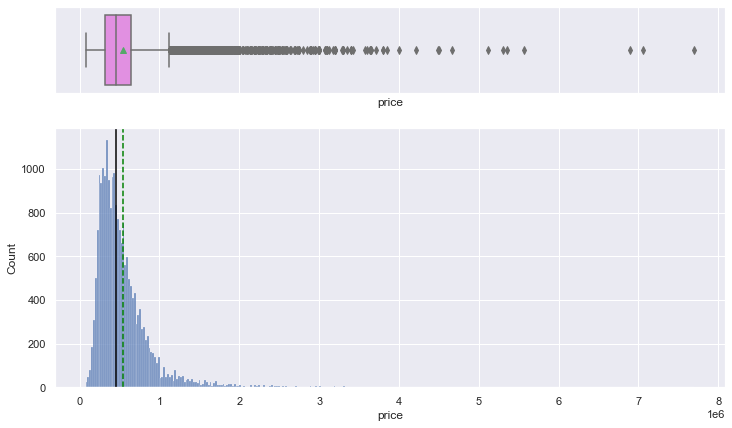

In [18]:
histogram_boxplot(df, "price")  # Checking price dristibution

Price is right skewed

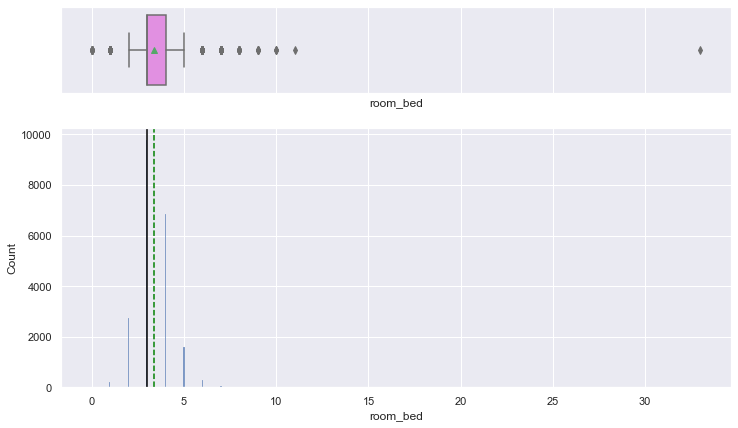

In [19]:
histogram_boxplot(df, "room_bed") #distribution of room_bed

The average number of bedrooms for the houses is 3 

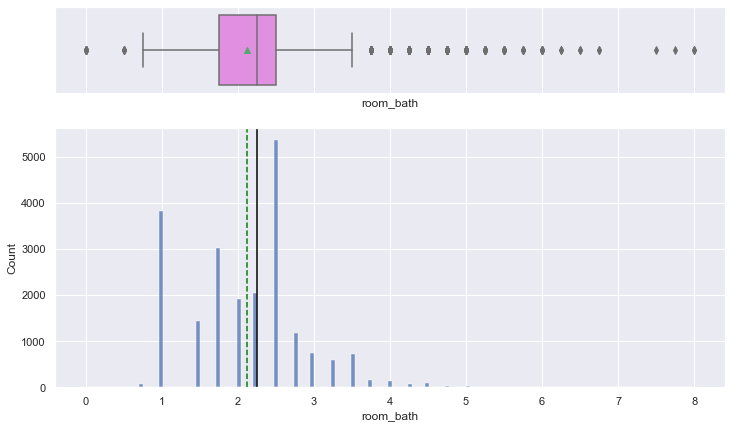

In [20]:
histogram_boxplot(df, "room_bath") #distribution of room_bath

The are 1-4 number of bathrooms per house

The average number of bathrroms being 2


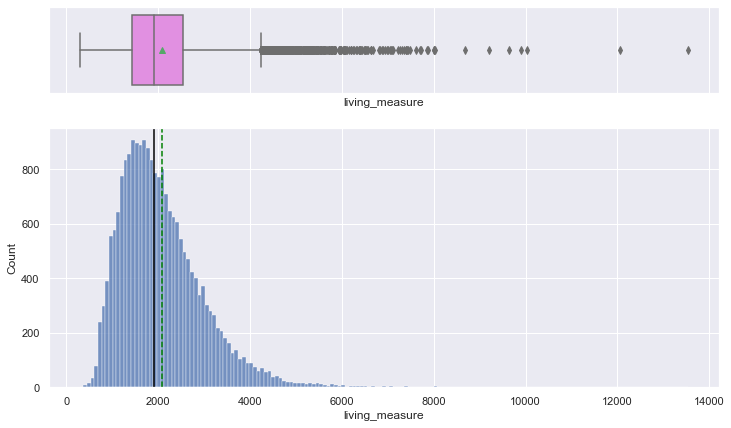

In [21]:
histogram_boxplot(df, "living_measure") # distribution of living measure

Living measure or the square footage of the home right skewed

The average square footage of the  home is approximately 2100

The maximum is 6000



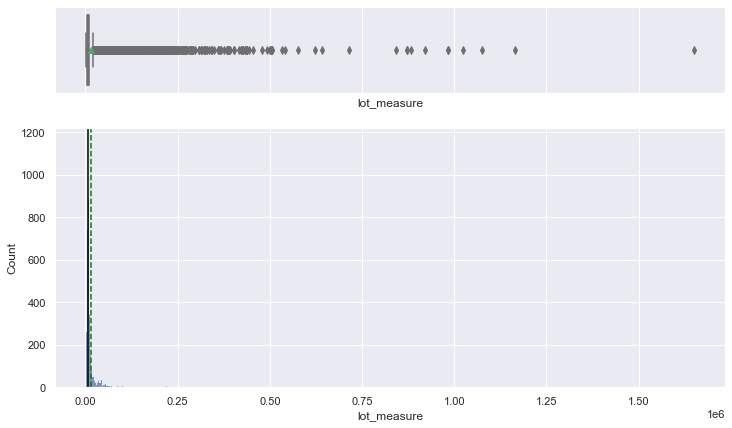

In [22]:
histogram_boxplot(df, "lot_measure") #distribution of lot_measure

-The lot measure is right skewed

- Minimum lot measture 520, maximum 1,000,000


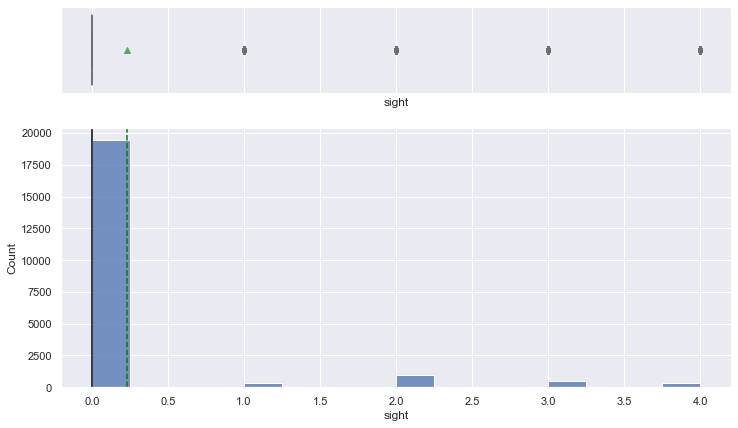

In [23]:
histogram_boxplot(df, "sight") # checking distribution of sight

- Most of the houses were not sighted. 

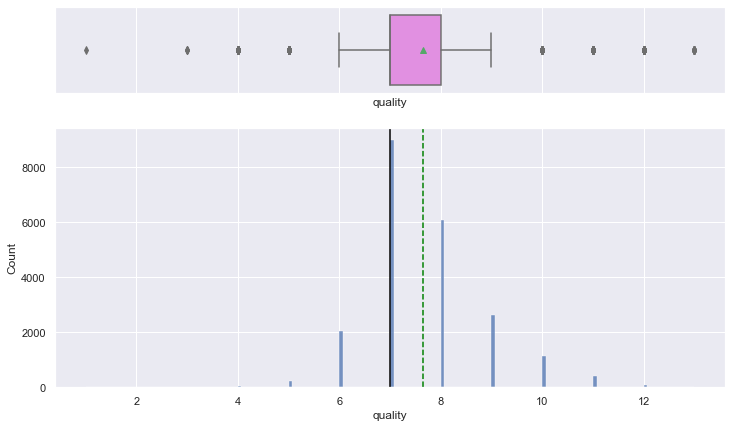

In [24]:
histogram_boxplot(df, "quality") #checking distribution of quality

The quality or grade given to the houses range from 1 to 12

The average qualit given is about 7.7, and the median being 7

histogram_boxplot(df, "ceil_measure")

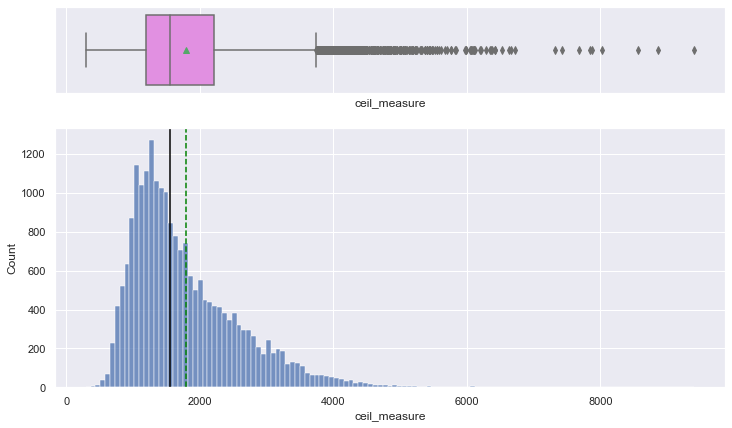

In [25]:
histogram_boxplot(df, "ceil_measure")  # Checking distribution of ceil measure

Cell measure is right skewed

Average is about 180 square foot

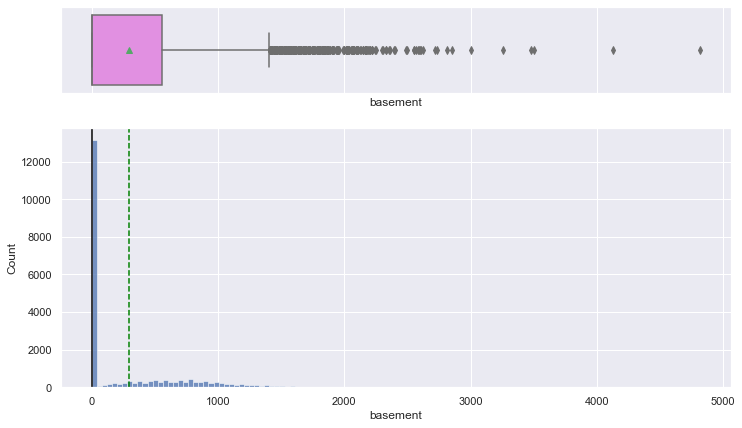

In [26]:
histogram_boxplot(df, "basement") #checking distribution of basement

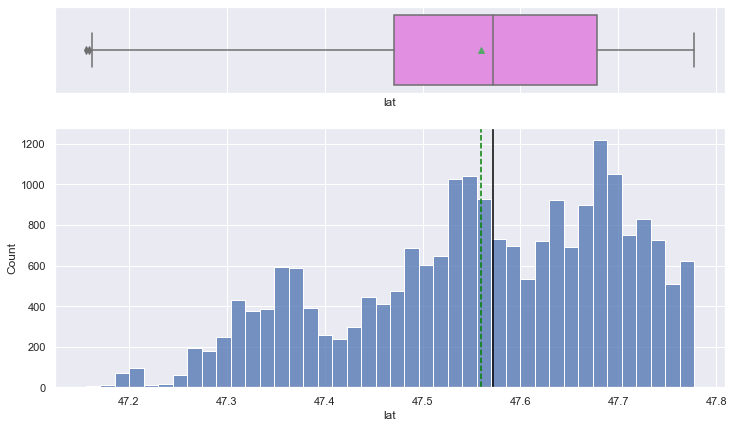

In [27]:
histogram_boxplot(df, "lat")  # checking distribution of lat

In [28]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

labeled_barplot(df, "dayhours", n = 20)

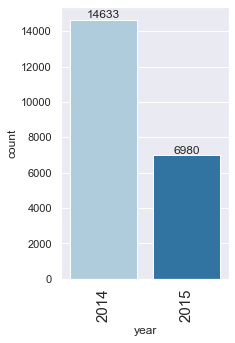

In [29]:
labeled_barplot(df, "year")   #bar plot of year 

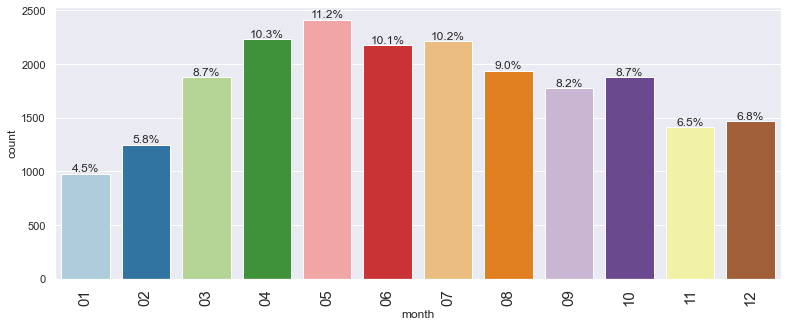

In [30]:
labeled_barplot(df, "month", perc = True)  #bar plot of month showing percentages of houses sold

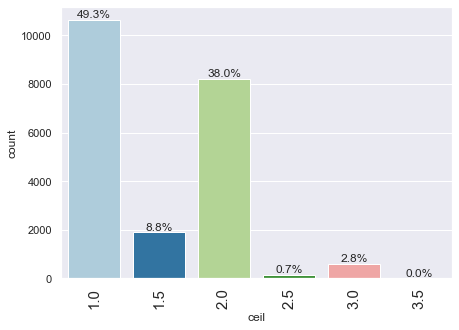

In [31]:
labeled_barplot(df, "ceil", perc = True); #Checking count of ceil or floors in houses

Most houses are 1 or two floors

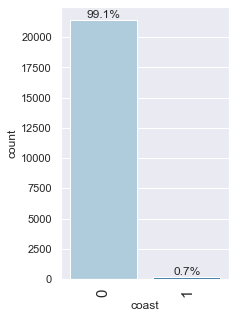

(None,)

In [32]:
labeled_barplot(df, "coast", perc = True), #checking whether houses are on the coast

99.1 percent of the homes are in non-coastal location

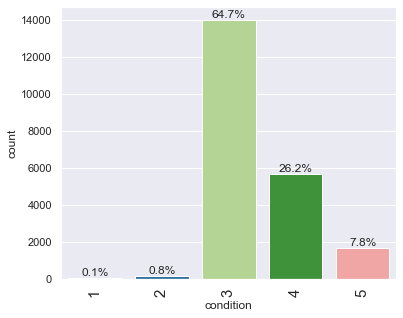

In [33]:
labeled_barplot(df, "condition", perc = True)   #barplot of condition showing percentages

- 64.7 of the houses had a condition rating of 3.
- Less than 1% had a rating of 2 or lower
-~33% had a rating of 4 or higher

-  The older house was built in 1934 and the newest in 2014

-  The newest house was buil

- Between 250 and 559 house were built in each year

- 14 missing values



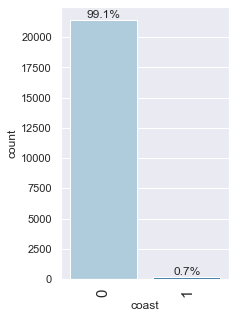

In [34]:
labeled_barplot(df, "coast", perc = True) #bar plot of coast

- Only 7 houses were on waterfront 

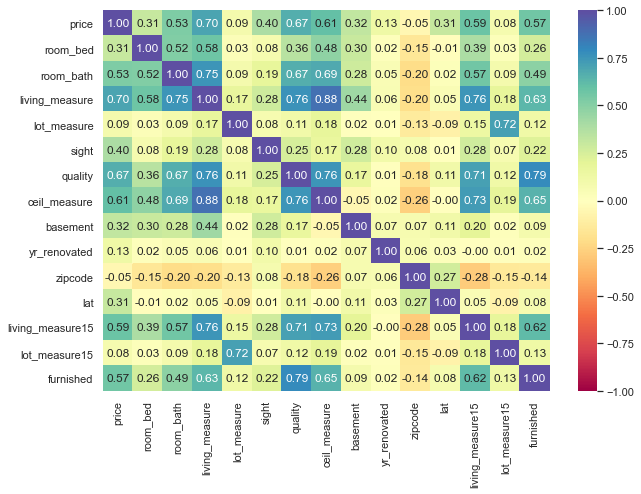

In [35]:
plt.figure(figsize=(10, 7))            
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral",
);
# Finding the correlation between numberic attributes

I will consider correlations greater than 5 as significant

Factors highly corrlated with price are:

furnished, living measure, ceil measure, quality, l

No feature was negatively correlated to price

Plotting Values that are highly corrlated

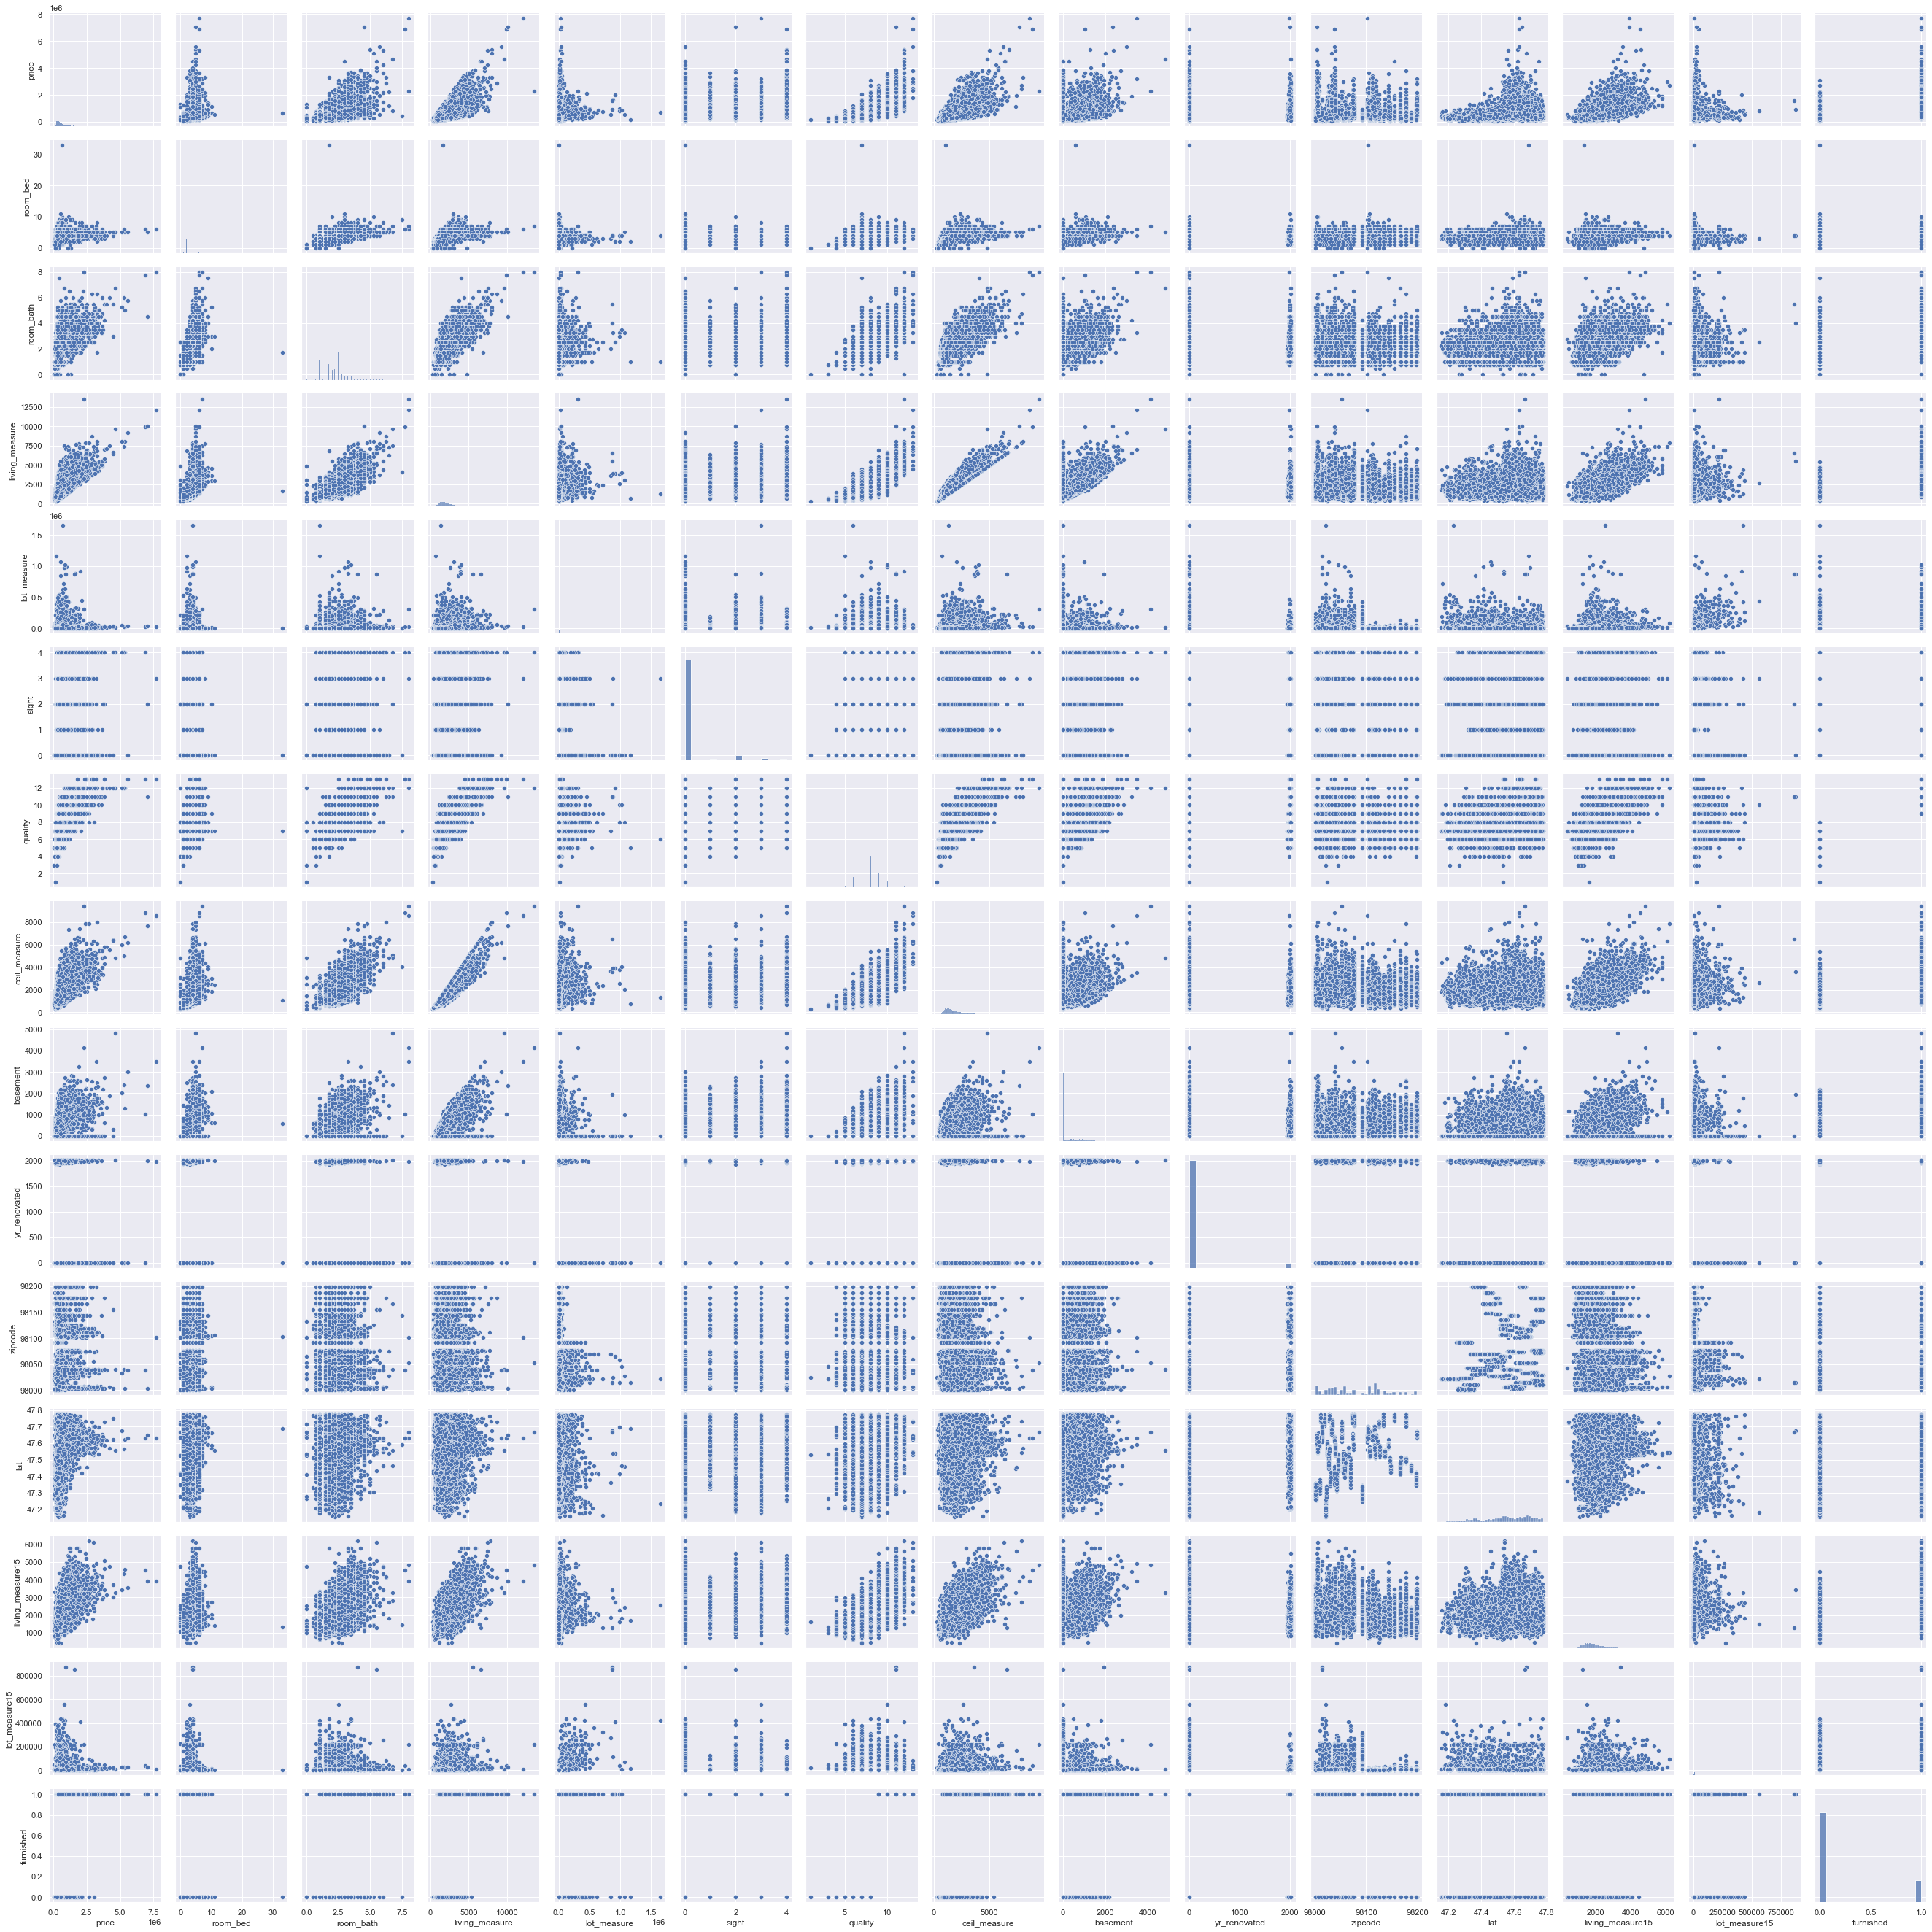

In [36]:
sns.pairplot(df,  kind = 'scatter', diag_kind = 'auto'); #pair plot of all numeric attributes

In [37]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

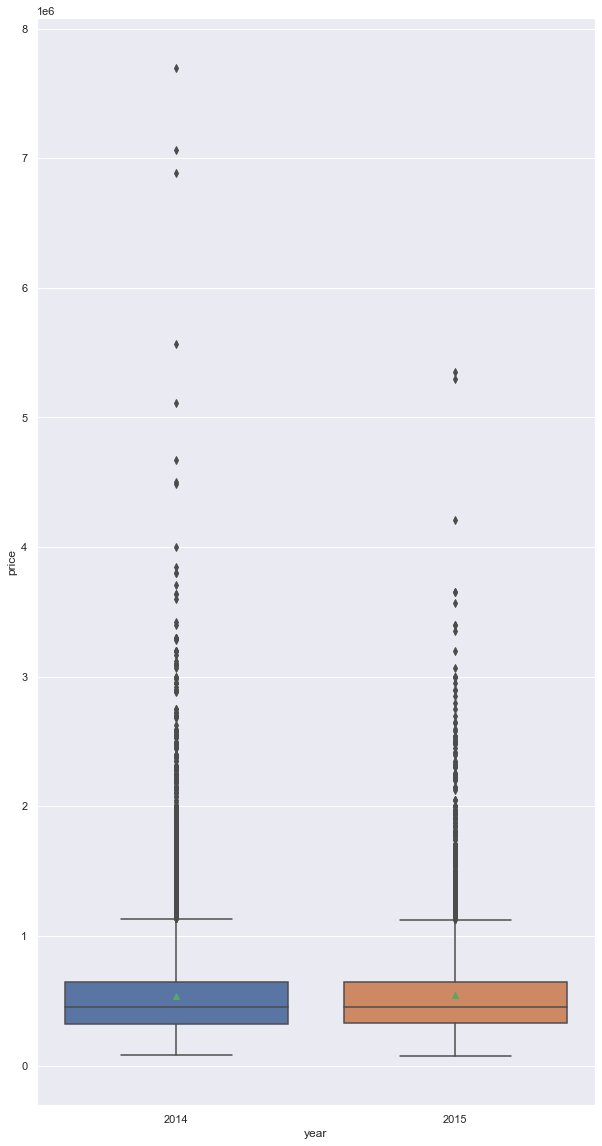

In [38]:
plt.figure(figsize = (10,20))
sns.boxplot(x = 'year',y = 'price', showmeans = True, data = df); #year vs price
plt.show()

- The average size per house in 2014 and 2015 are similar
- The sales in both years are right skewed


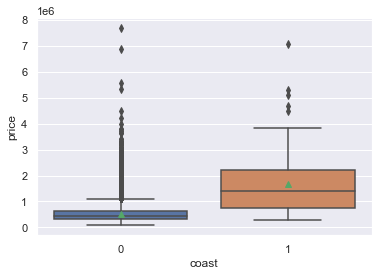

In [39]:
sns.boxplot(x = 'coast',y = 'price', showmeans=True, data = df); #, finding prices in coastal and non coastal);
plt.show()

- Coastal or waterfront houses are more expensive than house in non-coastal areas

-  Houses not identified as coastal or non-coastal have similar average price as non-coastal houses

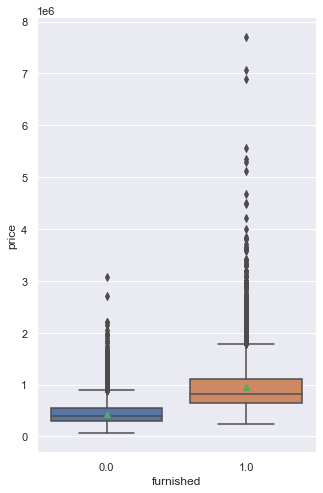

In [40]:
plt.figure(figsize=(5, 8))
sns.boxplot(x = 'furnished',y = 'price', showmeans=True,  data = df); 
plt.show()

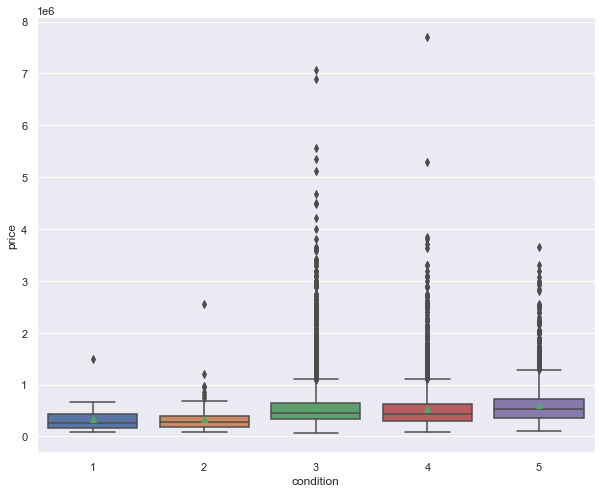

In [41]:
plt.figure (figsize = (10, 8))
sns.boxplot(x = 'condition',y = 'price', showmeans=True, data = df); #, hue = 'day_of_the_week');
plt.show()

<AxesSubplot:xlabel='month', ylabel='price'>

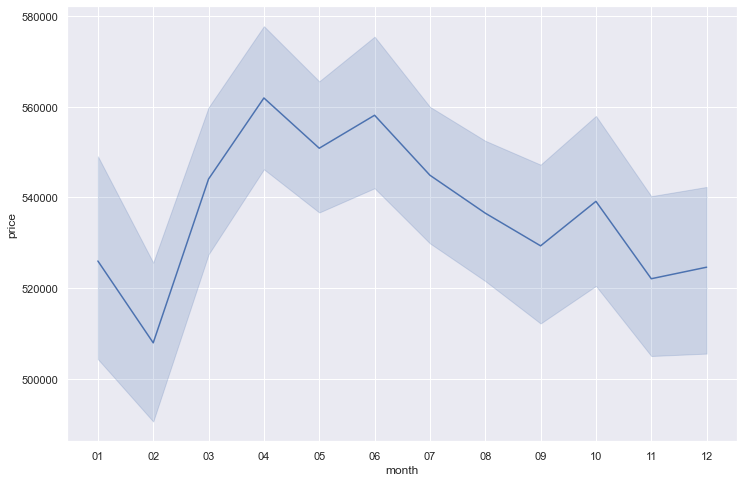

In [42]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x="month", y="price")     #Plotting to find average home prices for each month

- Average home prices surge between March and June

In [43]:
df.groupby("month")['price'].mean() # Checking avarage prices for each month

month
01    525963.251534
02    507919.603200
03    544057.683200
04    561933.463021
05    550849.746893
06    558123.736239
07    544892.161013
08    536527.039691
09    529315.868095
10    539127.477636
11    522058.861800
12    524602.893270
Name: price, dtype: float64

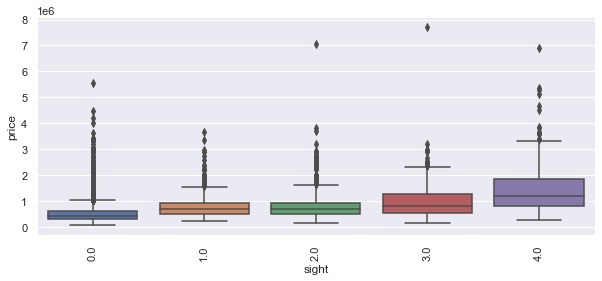

In [44]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x= "sight", y="price")  # Code to find price vs sight
plt.xticks(rotation = 90);

The more sighted the property, the higher the price

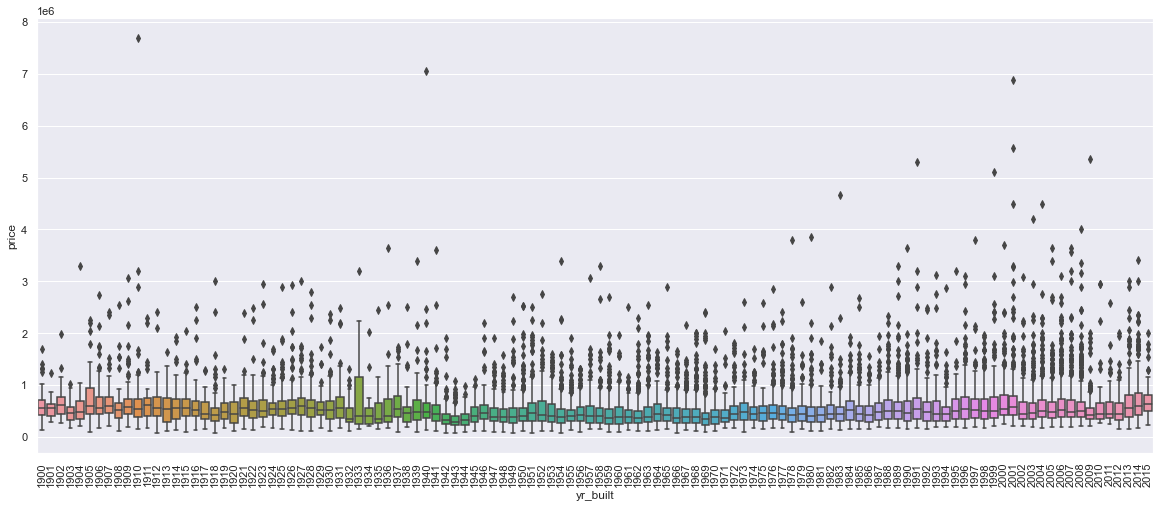

In [45]:
plt.figure(figsize=(20, 8))
plt.xticks(rotation = 90)
sns.boxplot(data=df, x= "yr_built", y="price");  # Code to find price vs sight

The prices don't change significantly with age of the building

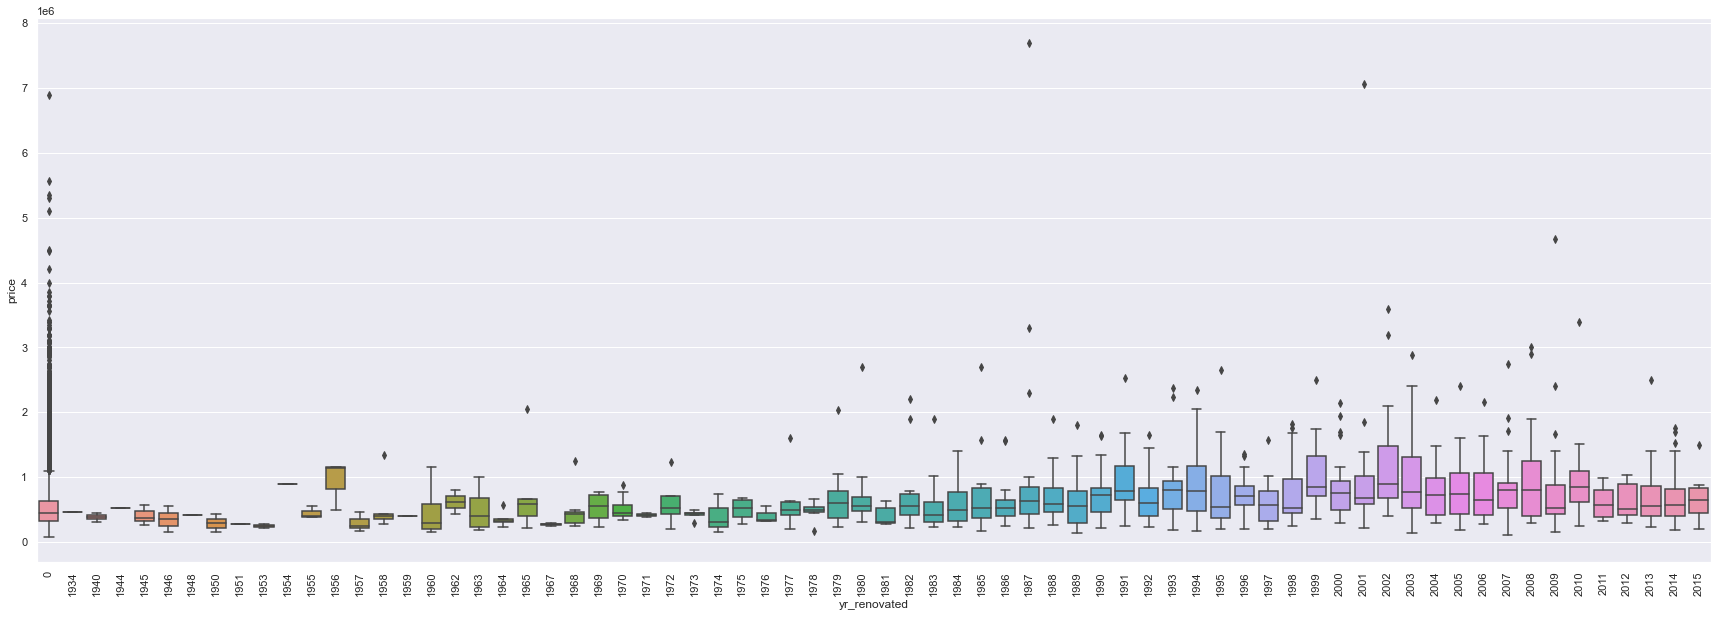

In [46]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation = 90)
sns.boxplot(data=df, x= "yr_renovated", y="price"); # Ploting  price vs year_renovated


- No relationship between year renovated and price of house

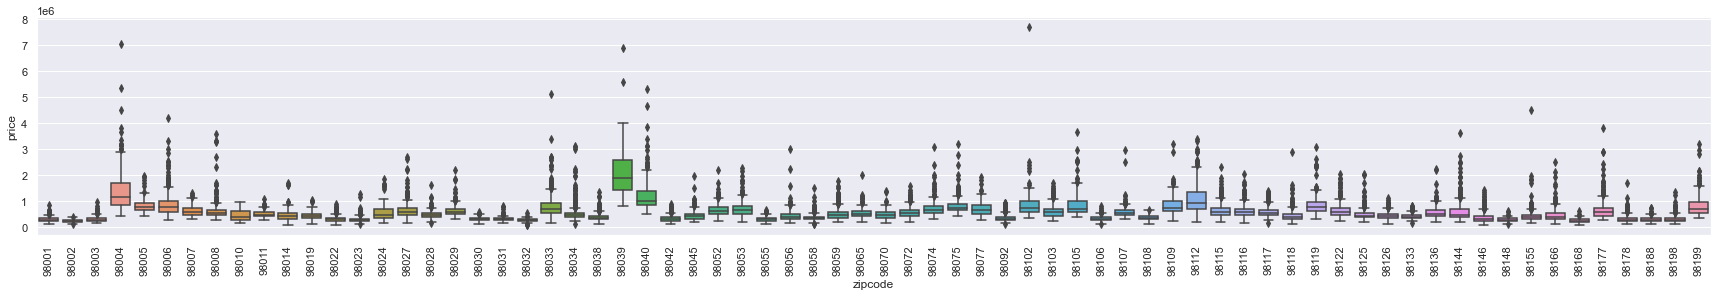

In [47]:
plt.figure(figsize=(30, 4))
sns.boxplot(data=df, x= "zipcode", y="price")
plt.xticks(rotation = 90);

- The zipcode 98039 has the hihgest average home price

In [48]:
percent_renovated = df[df['yr_renovated']>0].shape[0]     # Finding number of houses renovated
f'{percent_renovated}  of the 21613 were renovated, making {(percent_renovated)/df.shape[0]*100}% of houses renovated'      


'914  of the 21613 were renovated, making 4.228936288344977% of houses renovated'

**Data engineering**

In [49]:
df.info() # Finding data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   dayhours          21613 non-null  category
 1   price             21613 non-null  int64   
 2   room_bed          21505 non-null  float64 
 3   room_bath         21505 non-null  float64 
 4   living_measure    21596 non-null  float64 
 5   lot_measure       21571 non-null  float64 
 6   ceil              21541 non-null  category
 7   coast             21582 non-null  category
 8   sight             21556 non-null  float64 
 9   condition         21528 non-null  category
 10  quality           21612 non-null  float64 
 11  ceil_measure      21612 non-null  float64 
 12  basement          21612 non-null  float64 
 13  yr_built          21598 non-null  category
 14  yr_renovated      21613 non-null  int64   
 15  zipcode           21613 non-null  int64   
 16  lat               2161

In [50]:
df['ceil']= df['ceil'].astype(float)
df['condition']= df['condition'].astype(float)
df['yr_built']= df['yr_built'].astype(float)
df["total_area"]=df['total_area'].astype(float)
df["year"]=df['year'].astype(float)



In [51]:
# counting the number of missing values per row
df.isnull().sum() 

dayhours              0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 72
coast                31
sight                57
condition            85
quality               1
ceil_measure          1
basement              1
yr_built             15
yr_renovated          0
zipcode               0
lat                   0
long                 34
living_measure15    166
lot_measure15        29
furnished            29
total_area           68
year                  0
month                 0
day                   0
dtype: int64

In [52]:
df["yr_renovated"].replace(0, df["yr_built"].median(), inplace = True)

In [53]:
df1 = df.fillna(df.median())  # Filling all missing values with median


In [54]:
df1.sample(n = 10)  # Checking ten random rows

dayhours   price  room_bed  room_bath  living_measure  \
20986  20141014T000000  225000       2.0       1.00           700.0   
21556  20140521T000000  299800       2.0       1.00           790.0   
2656   20140922T000000  325000       4.0       1.00          1530.0   
15358  20150430T000000  216500       2.0       1.00          1060.0   
12263  20140929T000000  199129       3.0       1.00           860.0   
8559   20150425T000000  239000       3.0       1.00          1200.0   
3505   20140716T000000  345000       3.0       1.00          1120.0   
4212   20150301T000000  534000       4.0       1.75          2040.0   
15463  20140623T000000  400000       4.0       1.75          1700.0   
1576   20140529T000000  472000       6.0       2.50          4410.0   

       lot_measure  ceil coast  sight  condition  ...  zipcode      lat  \
20986       6000.0   1.0     0    0.0        3.0  ...    98055  47.4671   
21556       5240.0   1.0     0    0.0        4.0  ...    98118  47.5303   
2656        5684.0   1.0     0    0.0        3.0  ...    98108  47.5507   
15358       5200.0   1.0     0    0.0        3.0  ...    98042  47.3688   
12263      33664.0   1.0     0    0.0        4.0  ...    98001  47.2950   
8559        7810.0   1.0     0    0.0        4.0  ...    98038  47.3631   
3505       10176.0   1.0     0    0.0        3.0  ...    98118  47.5235   
4212        2750.0   1.5     0    0.0        4.0  ...    98105  47.6698   
15463      20283.0   1.5     0    0.0        3.0  ...    98019  47.7694   
1576       14034.0   1.0     0    2.0        4.0  ...    98003  47.3376   

          long  living_measure15  lot_measure15  furnished  total_area  \
20986 -122.212            1320.0         6000.0        0.0      6700.0   
21556 -122.288            1430.0         5320.0        0.0      6030.0   
2656  -122.298            1540.0         6095.0        0.0      7214.0   
15358 -122.080             910.0         5200.0        0.0      6260.0   
12263 -122.275            1290.0        18287.0        0.0     34524.0   
8559  -122.050            1590.0         7800.0        0.0      9010.0   
3505  -122.277            1350.0         7500.0        0.0     11296.0   
4212  -122.300            1940.0         3750.0        0.0      4790.0   
15463 -121.903            1680.0        21369.0        0.0     21983.0   
1576  -122.324            2600.0        13988.0        1.0     18444.0   

         year  month  day  
20986  2014.0     10   14  
21556  2014.0     05   21  
2656   2014.0     09   22  
15358  2015.0     04   30  
12263  2014.0     09   29  
8559   2015.0     04   25  
3505   2014.0     07   16  
4212   2015.0     03   01  
15463  2014.0     06   23  
1576   2014.0     05   29  

[10 rows x 25 columns]

In [55]:
df1.isna().sum() # Finding missing value

dayhours             0
price                0
room_bed             0
room_bath            0
living_measure       0
lot_measure          0
ceil                 0
coast               31
sight                0
condition            0
quality              0
ceil_measure         0
basement             0
yr_built             0
yr_renovated         0
zipcode              0
lat                  0
long                34
living_measure15     0
lot_measure15        0
furnished            0
total_area           0
year                 0
month                0
day                  0
dtype: int64

#New missing rows found in coast and long

room_bed/room_bath


In [56]:
df1["zipcode"]= df1["zipcode"].astype(str).str.slice(0,3)  # extracting just first 3 digit of zipcode
df1['zipcode'] = pd.Categorical(df1.zipcode)     # converting data type to categorical
df1.dtypes

dayhours            category
price                  int64
room_bed             float64
room_bath            float64
living_measure       float64
lot_measure          float64
ceil                 float64
coast               category
sight                float64
condition            float64
quality              float64
ceil_measure         float64
basement             float64
yr_built             float64
yr_renovated           int64
zipcode             category
lat                  float64
long                category
living_measure15     float64
lot_measure15        float64
furnished            float64
total_area           float64
year                 float64
month               category
day                 category
dtype: object

In [57]:
df1["lat"]=df["lat"].astype(str).str.slice(3,7).astype("float")
df1["long"]=df["long"].astype(str).str.slice(5,8).astype("float")
df1

dayhours    price  room_bed  room_bath  living_measure  \
0      20150427T000000   600000       4.0       1.75          3050.0   
1      20150317T000000   190000       2.0       1.00           670.0   
2      20140820T000000   735000       4.0       2.75          3040.0   
3      20141010T000000   257000       3.0       2.50          1740.0   
4      20150218T000000   450000       2.0       1.00          1120.0   
...                ...      ...       ...        ...             ...   
21608  20150310T000000   685530       4.0       2.50          3130.0   
21609  20140521T000000   535000       2.0       1.00          1030.0   
21610  20140905T000000   998000       3.0       3.75          3710.0   
21611  20150206T000000   262000       4.0       2.50          1560.0   
21612  20141229T000000  1150000       4.0       2.50          1940.0   

       lot_measure  ceil coast  sight  condition  ...  zipcode     lat   long  \
0           9440.0   1.0     0    0.0        3.0  ...      980  7228.0  183.0   
1           3101.0   1.0     0    0.0        4.0  ...      981  5546.0  274.0   
2           2415.0   2.0     1    4.0        3.0  ...      981  5188.0  256.0   
3           3721.0   2.0     0    0.0        3.0  ...      980  3363.0  213.0   
4           4590.0   1.0     0    0.0        3.0  ...      981  5663.0  285.0   
...            ...   ...   ...    ...        ...  ...      ...     ...    ...   
21608      60467.0   2.0     0    0.0        3.0  ...      980  6618.0  962.0   
21609       4841.0   1.0     0    0.0        3.0  ...      981   686.0  341.0   
21610      34412.0   2.0     0    0.0        3.0  ...      980  5888.0    4.0   
21611       7800.0   2.0     0    0.0        3.0  ...      981   514.0  316.0   
21612       4875.0   2.0     0    0.0        4.0  ...      981  6427.0  304.0   

       living_measure15  lot_measure15 furnished  total_area    year  month  \
0                2020.0         8660.0       0.0     12490.0  2015.0     04   
1                1660.0         4100.0       0.0      3771.0  2015.0     03   
2                2620.0         2433.0       0.0      5455.0  2014.0     08   
3                2030.0         3794.0       0.0      5461.0  2014.0     10   
4                1120.0         5100.0       0.0      5710.0  2015.0     02   
...                 ...            ...       ...         ...     ...    ...   
21608            2780.0        44224.0       1.0     63597.0  2015.0     03   
21609            1530.0         4944.0       0.0      5871.0  2014.0     05   
21610            2390.0        34412.0       1.0     38122.0  2014.0     09   
21611            1160.0         7800.0       0.0      9360.0  2015.0     02   
21612            1790.0         4875.0       1.0      6815.0  2014.0     12   

       day  
0       27  
1       17  
2       20  
3       10  
4       18  
...    ...  
21608   10  
21609   21  
21610   05  
21611   06  
21612   29  

[21613 rows x 25 columns]

In [58]:
df1["furnished"]=df1["furnished"].astype("category")
df1["sight"]=df1["sight"].astype("category")

In [59]:
df1.info() # Finding data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   dayhours          21613 non-null  category
 1   price             21613 non-null  int64   
 2   room_bed          21613 non-null  float64 
 3   room_bath         21613 non-null  float64 
 4   living_measure    21613 non-null  float64 
 5   lot_measure       21613 non-null  float64 
 6   ceil              21613 non-null  float64 
 7   coast             21582 non-null  category
 8   sight             21613 non-null  category
 9   condition         21613 non-null  float64 
 10  quality           21613 non-null  float64 
 11  ceil_measure      21613 non-null  float64 
 12  basement          21613 non-null  float64 
 13  yr_built          21613 non-null  float64 
 14  yr_renovated      21613 non-null  int64   
 15  zipcode           21613 non-null  category
 16  lat               2161

In [60]:
df1.dropna(inplace = True)  # 34 rows with missing values


In [61]:
df1.isna().sum() #Finding missing values

dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
year                0
month               0
day                 0
dtype: int64

# No missing value

In [62]:
df1["house_age"] = df1['year']- df1['yr_built']
df1["renovation_age"] = df1['year']- df1['yr_renovated']

In [63]:
df1["logprice"] = np.log(df1["price"])

In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21548 entries, 0 to 21612
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   dayhours          21548 non-null  category
 1   price             21548 non-null  int64   
 2   room_bed          21548 non-null  float64 
 3   room_bath         21548 non-null  float64 
 4   living_measure    21548 non-null  float64 
 5   lot_measure       21548 non-null  float64 
 6   ceil              21548 non-null  float64 
 7   coast             21548 non-null  category
 8   sight             21548 non-null  category
 9   condition         21548 non-null  float64 
 10  quality           21548 non-null  float64 
 11  ceil_measure      21548 non-null  float64 
 12  basement          21548 non-null  float64 
 13  yr_built          21548 non-null  float64 
 14  yr_renovated      21548 non-null  int64   
 15  zipcode           21548 non-null  category
 16  lat               2154

In [65]:
#Dropping unwanted columns
df2 = df1.drop(["dayhours", 'year', 'yr_built',"yr_renovated", "day", "price"], axis = 1 )

In [66]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21548 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   room_bed          21548 non-null  float64 
 1   room_bath         21548 non-null  float64 
 2   living_measure    21548 non-null  float64 
 3   lot_measure       21548 non-null  float64 
 4   ceil              21548 non-null  float64 
 5   coast             21548 non-null  category
 6   sight             21548 non-null  category
 7   condition         21548 non-null  float64 
 8   quality           21548 non-null  float64 
 9   ceil_measure      21548 non-null  float64 
 10  basement          21548 non-null  float64 
 11  zipcode           21548 non-null  category
 12  lat               21548 non-null  float64 
 13  long              21548 non-null  float64 
 14  living_measure15  21548 non-null  float64 
 15  lot_measure15     21548 non-null  float64 
 16  furnished         2154

## Data Preprocessing (contd.)

### Outlier Detection

- Let's look at outliers in every numerical column

In [67]:
numeric_columns = df2.select_dtypes(include=np.number).columns.tolist()
#numeric_columns.remove(["lat", "long"])  # dropping year column as it is temporal variable

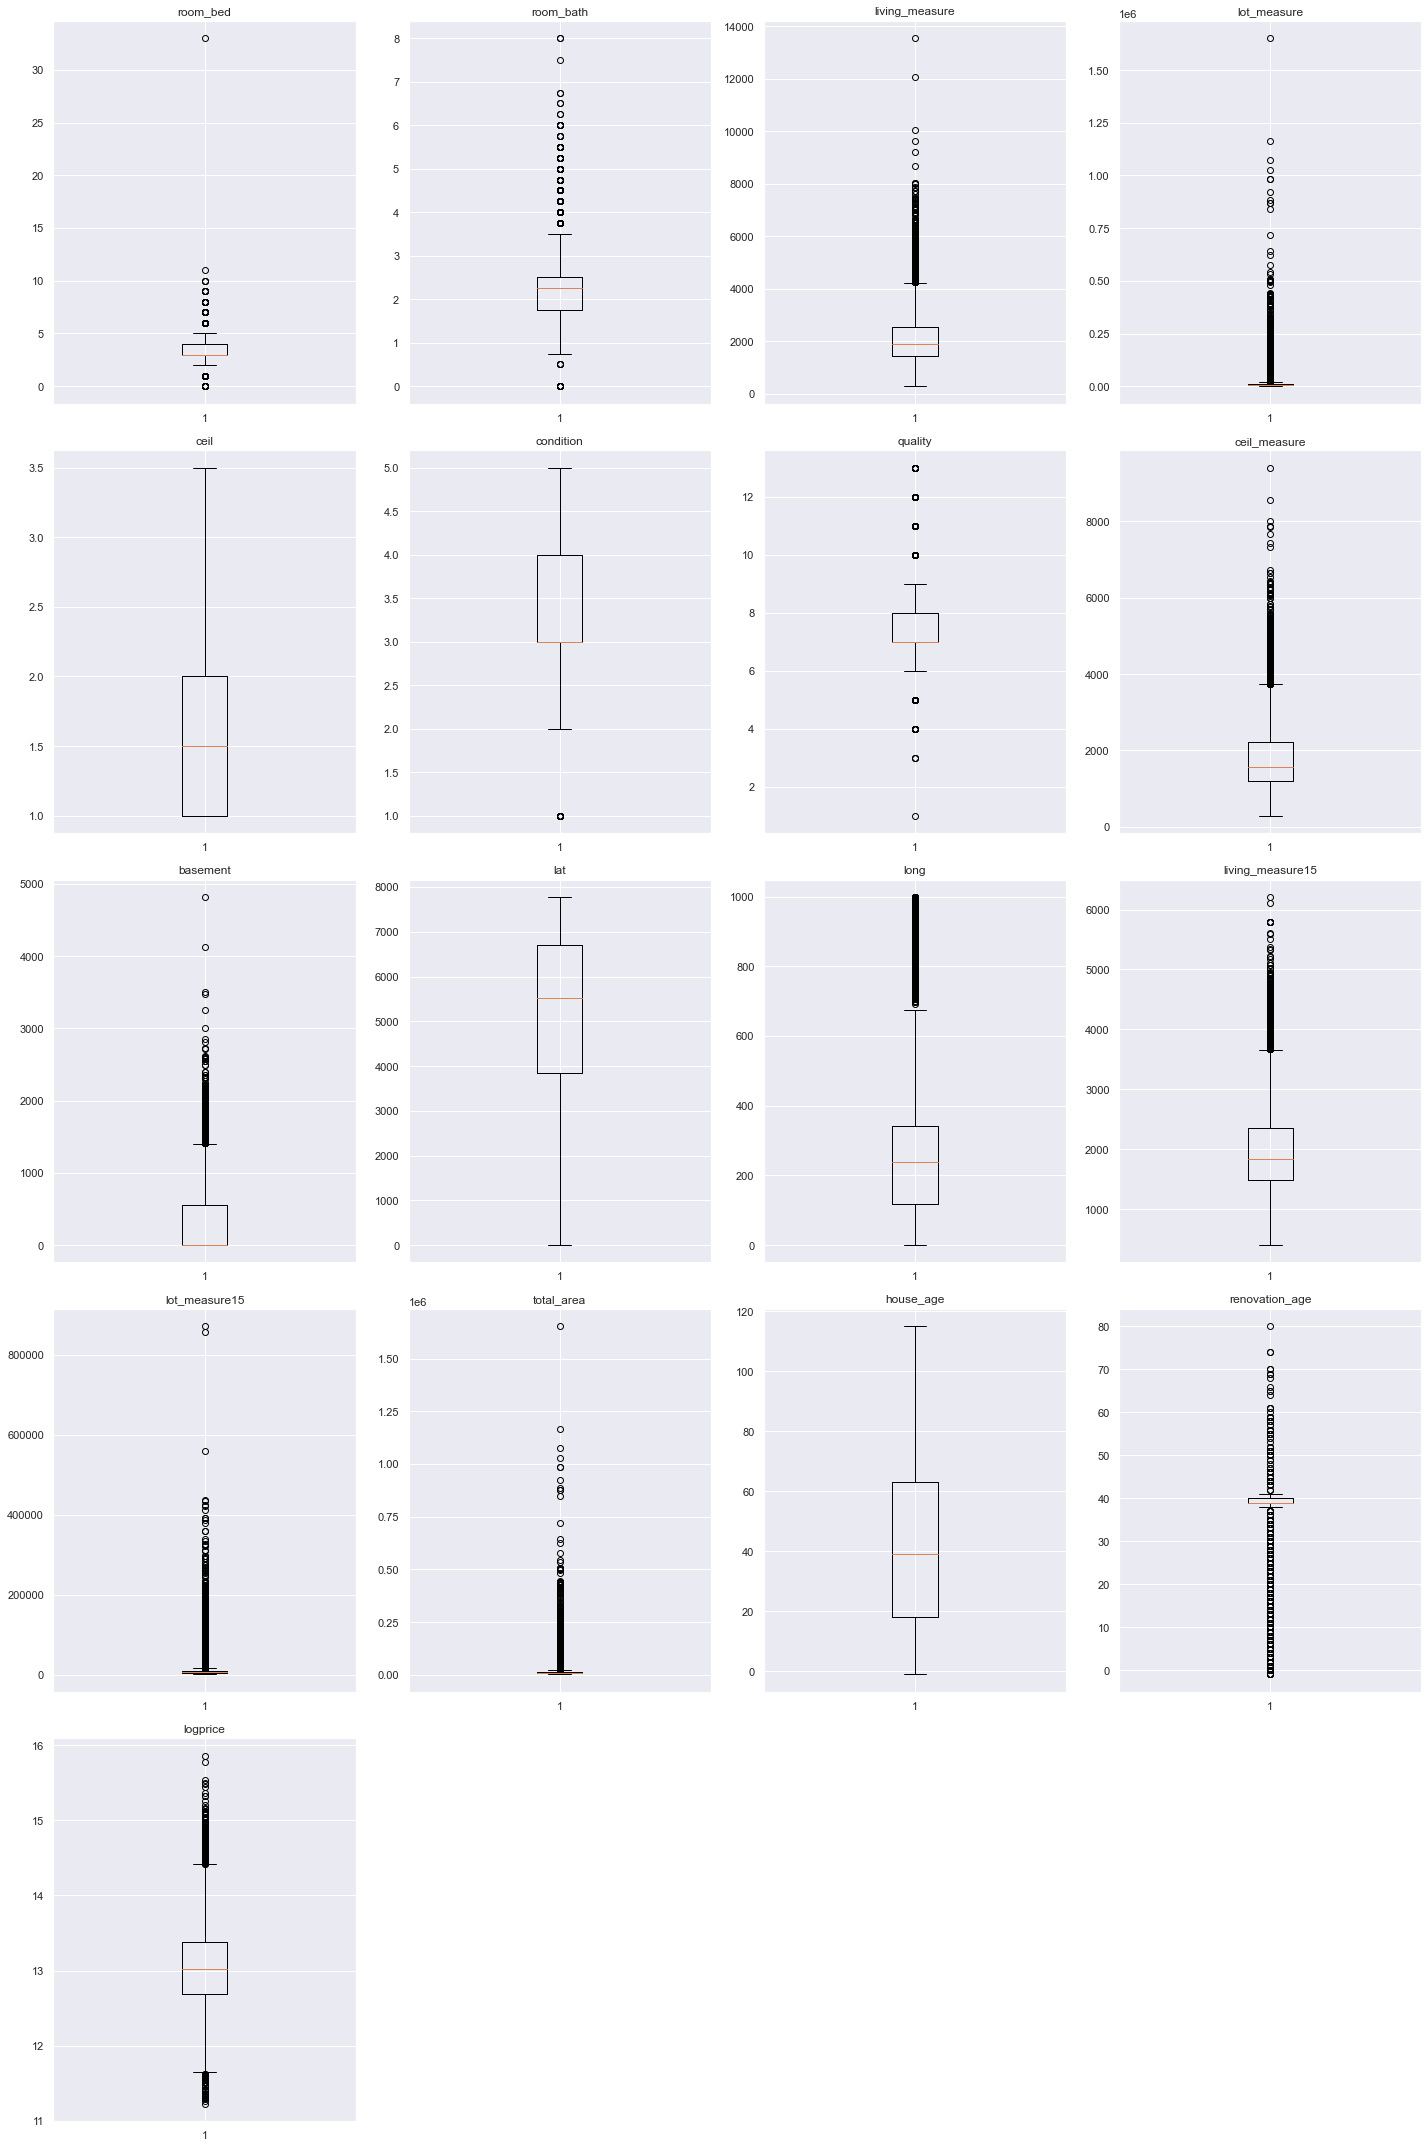

In [68]:
# let's plot the boxplots of all columns to check for outliers
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [69]:
df2

room_bed  room_bath  living_measure  lot_measure  ceil coast sight  \
0           4.0       1.75          3050.0       9440.0   1.0     0   0.0   
1           2.0       1.00           670.0       3101.0   1.0     0   0.0   
2           4.0       2.75          3040.0       2415.0   2.0     1   4.0   
3           3.0       2.50          1740.0       3721.0   2.0     0   0.0   
4           2.0       1.00          1120.0       4590.0   1.0     0   0.0   
...         ...        ...             ...          ...   ...   ...   ...   
21608       4.0       2.50          3130.0      60467.0   2.0     0   0.0   
21609       2.0       1.00          1030.0       4841.0   1.0     0   0.0   
21610       3.0       3.75          3710.0      34412.0   2.0     0   0.0   
21611       4.0       2.50          1560.0       7800.0   2.0     0   0.0   
21612       4.0       2.50          1940.0       4875.0   2.0     0   0.0   

       condition  quality  ceil_measure  ...     lat   long  living_measure15  \
0            3.0      8.0        1800.0  ...  7228.0  183.0            2020.0   
1            4.0      6.0         670.0  ...  5546.0  274.0            1660.0   
2            3.0      8.0        3040.0  ...  5188.0  256.0            2620.0   
3            3.0      8.0        1740.0  ...  3363.0  213.0            2030.0   
4            3.0      7.0        1120.0  ...  5663.0  285.0            1120.0   
...          ...      ...           ...  ...     ...    ...               ...   
21608        3.0      9.0        3130.0  ...  6618.0  962.0            2780.0   
21609        3.0      7.0         920.0  ...   686.0  341.0            1530.0   
21610        3.0     10.0        2910.0  ...  5888.0    4.0            2390.0   
21611        3.0      7.0        1560.0  ...   514.0  316.0            1160.0   
21612        4.0      9.0        1940.0  ...  6427.0  304.0            1790.0   

       lot_measure15  furnished  total_area month  house_age renovation_age  \
0             8660.0        0.0     12490.0    04       49.0           40.0   
1             4100.0        0.0      3771.0    03       67.0           40.0   
2             2433.0        0.0      5455.0    08       48.0           39.0   
3             3794.0        0.0      5461.0    10        5.0           39.0   
4             5100.0        0.0      5710.0    02       91.0           40.0   
...              ...        ...         ...   ...        ...            ...   
21608        44224.0        1.0     63597.0    03       19.0           40.0   
21609         4944.0        0.0      5871.0    05       75.0           39.0   
21610        34412.0        1.0     38122.0    09       36.0           39.0   
21611         7800.0        0.0      9360.0    02       18.0           40.0   
21612         4875.0        1.0      6815.0    12       89.0           39.0   

        logprice  
0      13.304685  
1      12.154779  
2      13.507626  
3      12.456831  
4      13.017003  
...          ...  
21608  13.437948  
21609  13.190022  
21610  13.813509  
21611  12.476100  
21612  13.955273  

[21548 rows x 22 columns]

### Outlier Treatment

- Let's treat outliers in the data by flooring and capping.

In [70]:
def treat_outliers(df2, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df2[col].quantile(0.25)  # 25th quantile
    Q3 = df2[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df2[col] = np.clip(df2[col], Lower_Whisker, Upper_Whisker)

    return df2


def treat_outliers_all(df2, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df2, c)

    return df2

In [71]:
# treating the outliers
numerical_col = df2.select_dtypes(include=np.number).columns.tolist()
df2 = treat_outliers_all(df2, numerical_col)

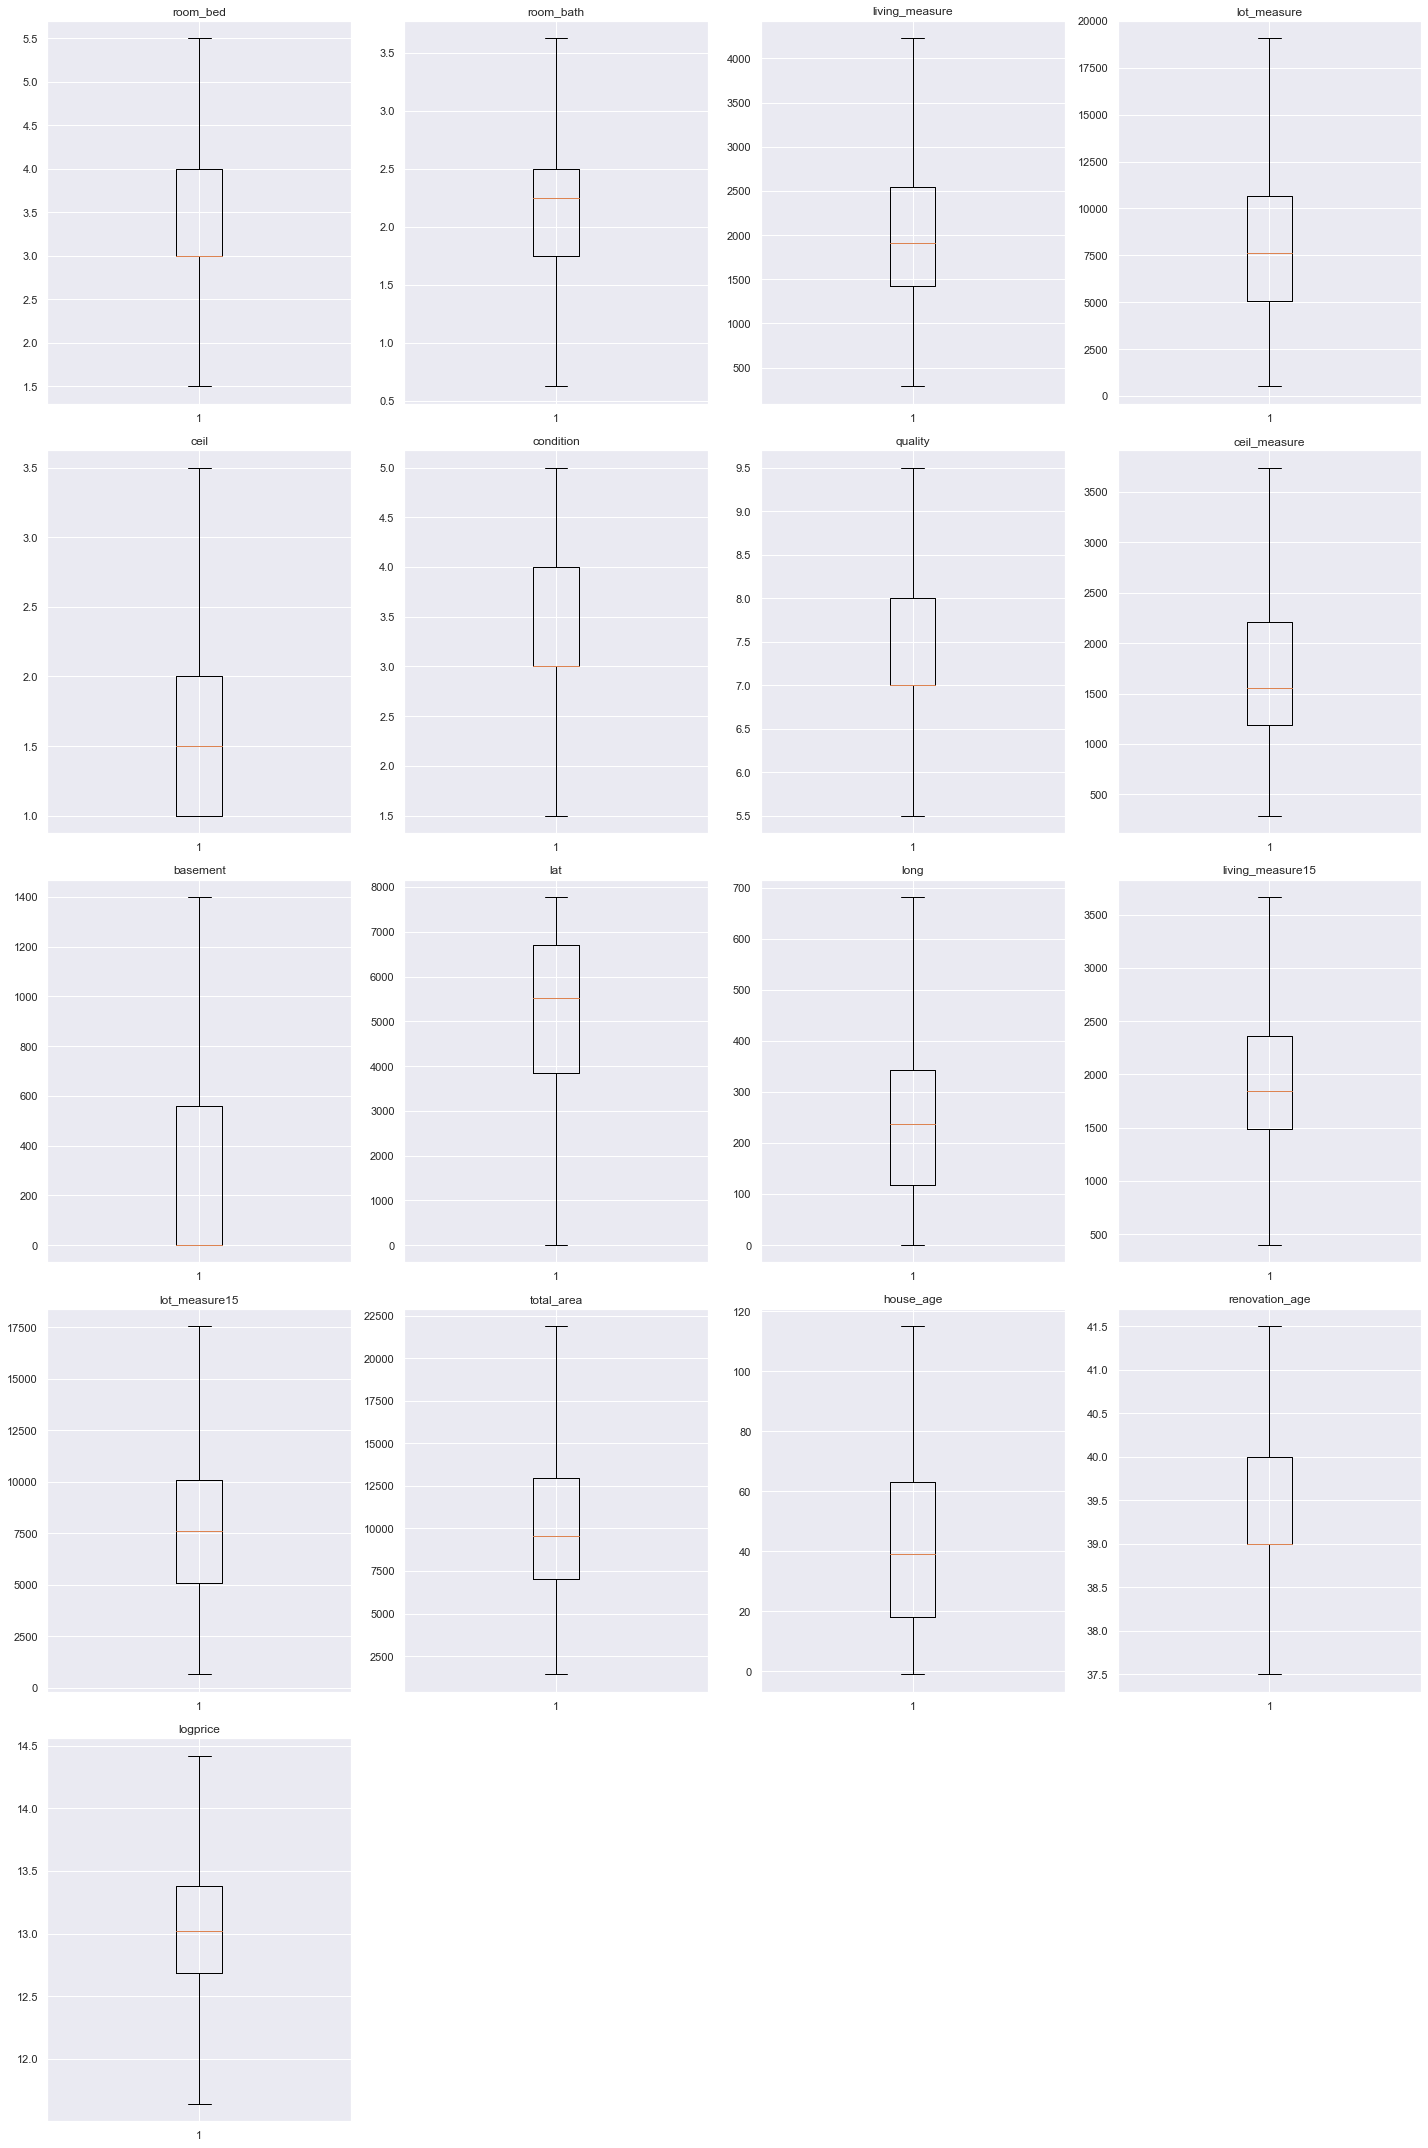

In [72]:
# let's look at the boxplots to see if the outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

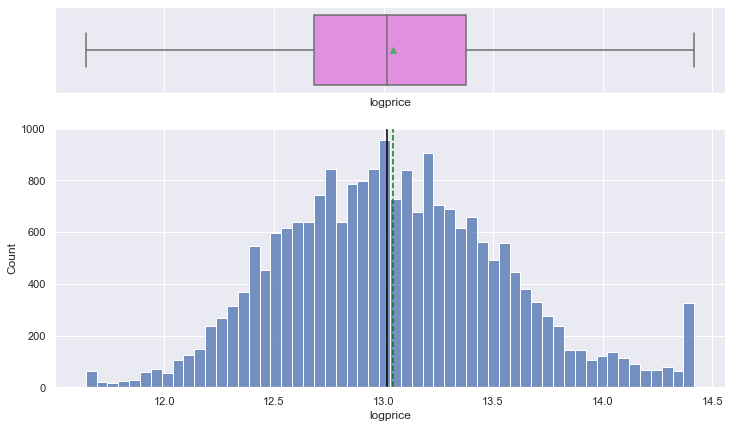

In [73]:
histogram_boxplot(df2, "logprice")  # Checking dristibution of the logprice without outliers

The log of price is uniformly distributed.

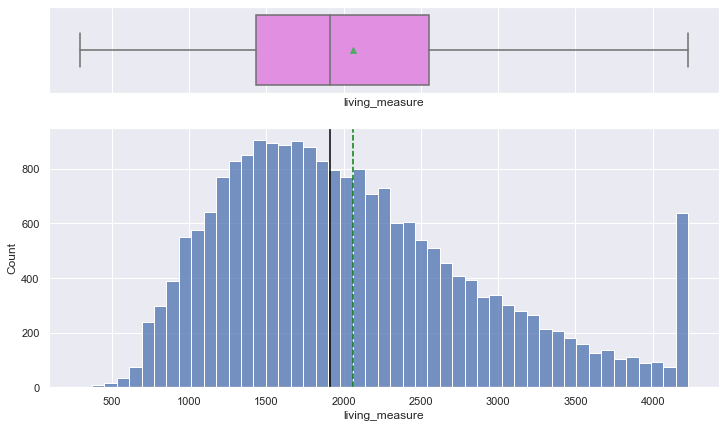

In [74]:
histogram_boxplot(df2, "living_measure") # distribution of living measure without outliers

The distribution of living measure is right skewed.

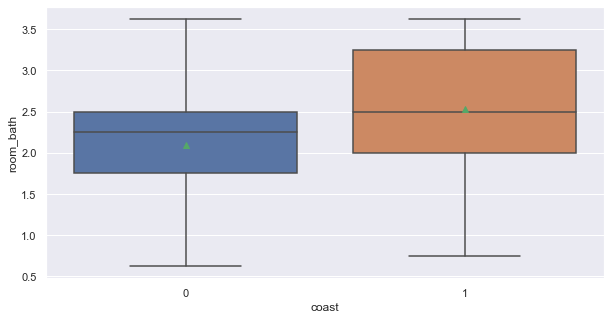

In [75]:
plt.figure(figsize = (10,5))
sns.boxplot(x = 'coast',y = 'room_bath', showmeans = True,  data = df2); # boxplot of room_bath at  coast(1) and non coast(0) houses.
plt.show()

- House on the coast have higher mean room_bath than those not on the coast

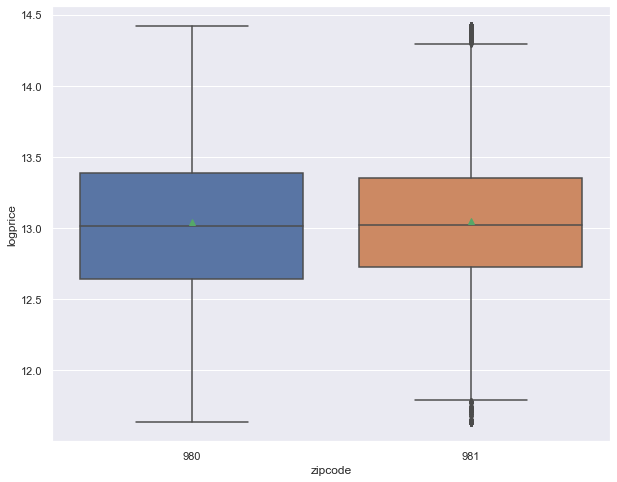

In [76]:
plt.figure(figsize = (10,8))
sns.boxplot(x = 'zipcode',y = 'logprice', showmeans = True,  data = df2); # boxplot of prices at two different areas. numbers represnt first3 digit of zipoce
plt.show()

- House prices at zipcode starting at 980 and 981 are comparable

- The basement numbers are skewed to the right

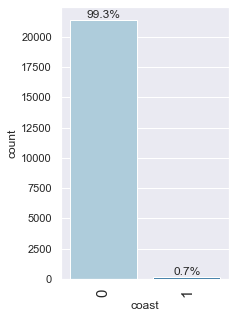

In [77]:
labeled_barplot(df2, "coast", perc = True) #bar plot of coast

C:\Users\eadogla\Anaconda3\Anaconda1\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


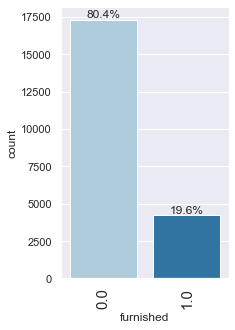

In [78]:
labeled_barplot(df2, "furnished", perc = True); #bar plot of coast

- About 1 in 5 of the houses are furnished

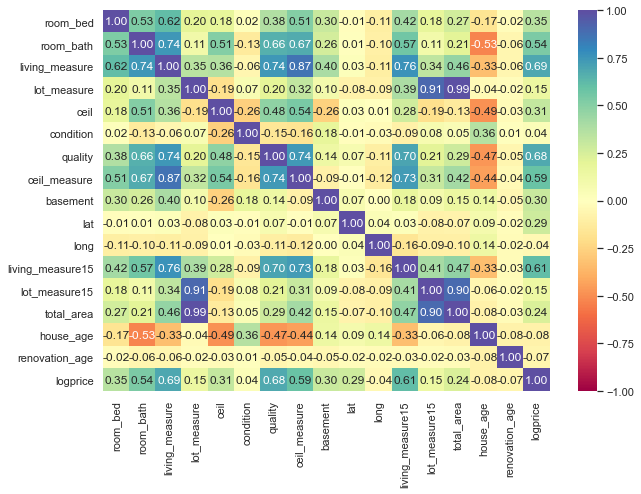

In [79]:
plt.figure(figsize=(10, 7))            
sns.heatmap(
    df2.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral",
);
# Finding the correlation between numberic attributes without their outliers

- I will consider positive correlations greater than 5 as significant

- Factors highly corrlated with logprice are:

- room_bath, living_measure, ceil_measure, quality, living measure15

- Negativeley correlated attributes are very low < 0.1

- They are: long, house_age and renovation_age

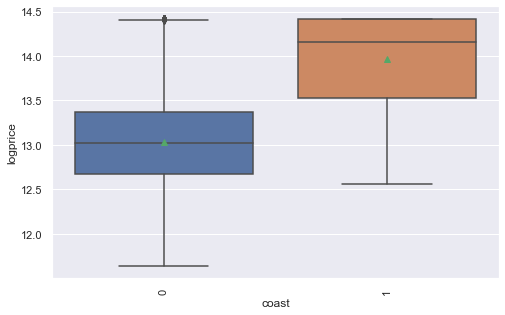

In [80]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df2, x= "coast", showmeans = True,  y="logprice")  # Code to find price vs sight
plt.xticks(rotation = 90);

- The pricesat zip codes starting 980 and 981 are comparable

C:\Users\eadogla\Anaconda3\Anaconda1\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


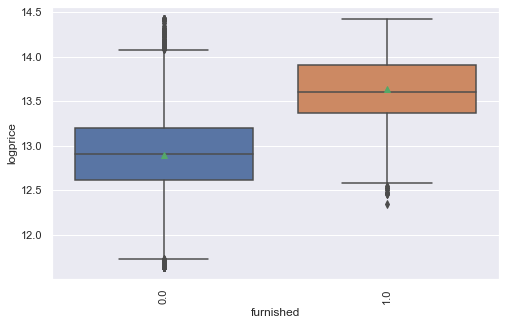

In [81]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df2, x= "furnished", showmeans = True,  y="logprice");  # Code to find price vs sight
plt.xticks(rotation = 90);

<AxesSubplot:xlabel='month', ylabel='logprice'>

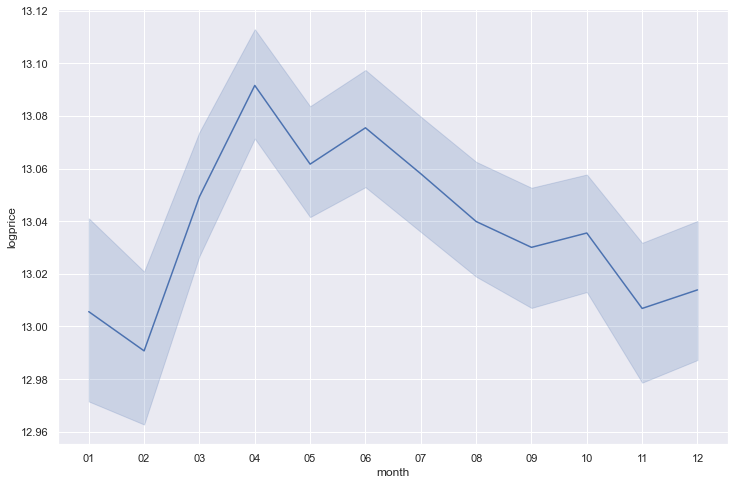

In [82]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df2, x="month", y="logprice")     #Plotting to find  trend of log of average home prices for each month

- House prices start inreasesing from February and reach highest in April

- Three period for high house prices are April to June

- The period for low house prices are November to February

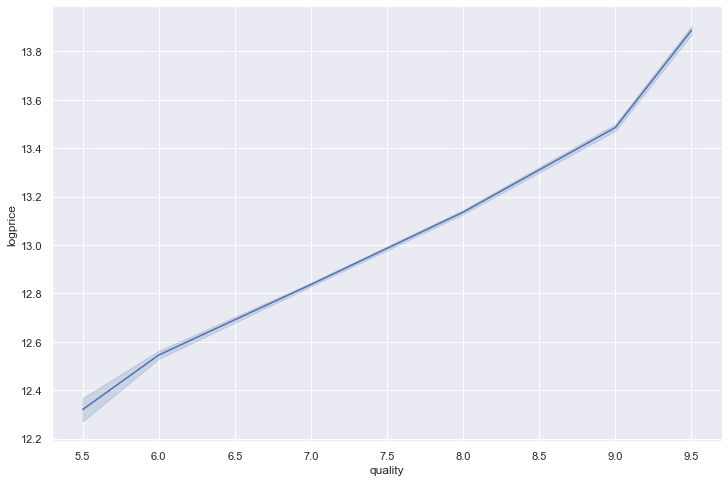

In [83]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df2, x="quality",  y="logprice");     #Plotting to find  trend of log of average home prices for each month

- logprice increases with increase in quality rating

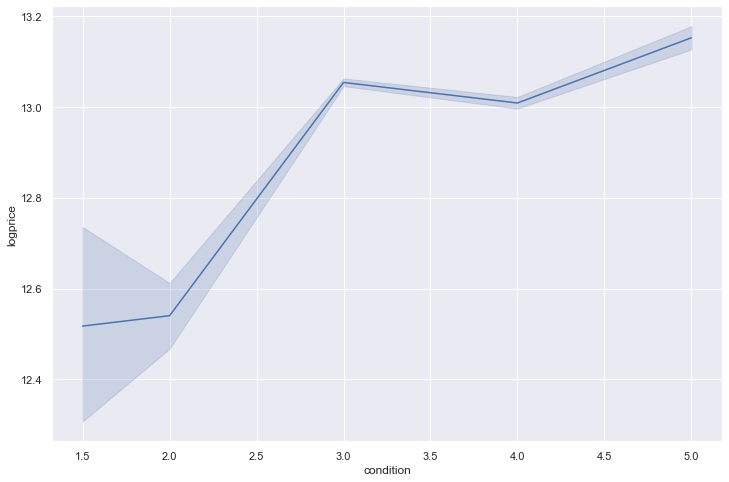

In [84]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df2, x="condition", y="logprice");     #Plotting to find  trend of log of average home prices for each condition

- logprice increases with condition

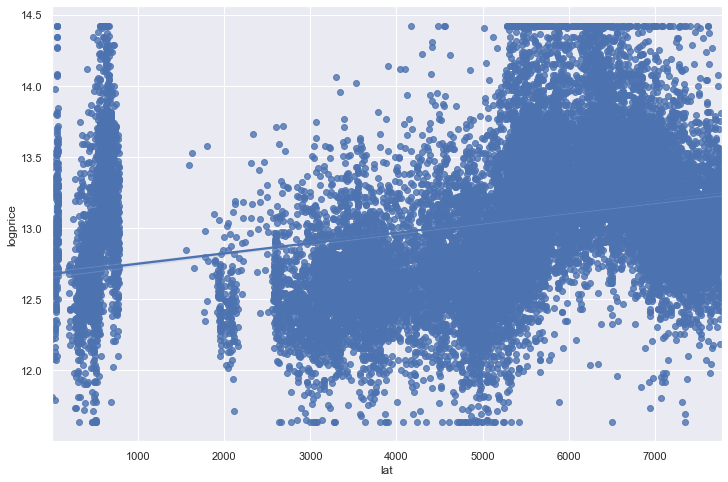

In [85]:
plt.figure(figsize=(12, 8))
sns.regplot(data=df2, x="lat", y="logprice");

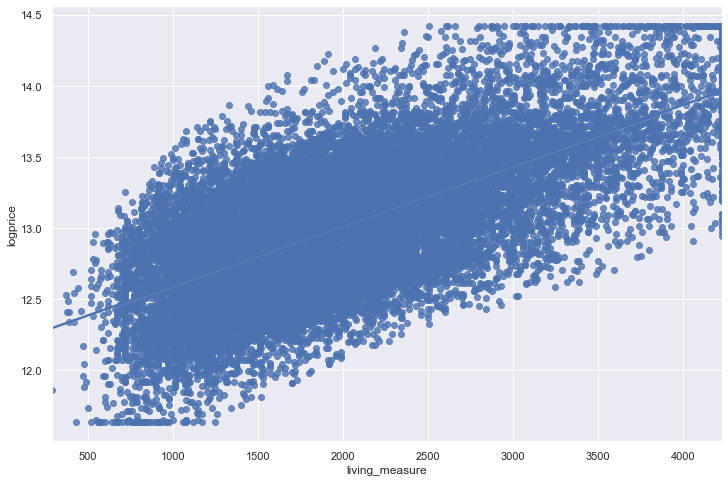

In [86]:
plt.figure(figsize=(12, 8))
sns.regplot(data=df2, x="living_measure",  y="logprice");

C:\Users\eadogla\Anaconda3\Anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


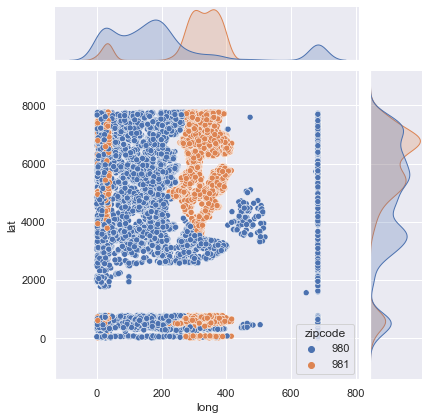

In [87]:
 sns.jointplot("long", "lat", df2, kind='scatter', hue = "zipcode")

C:\Users\eadogla\Anaconda3\Anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


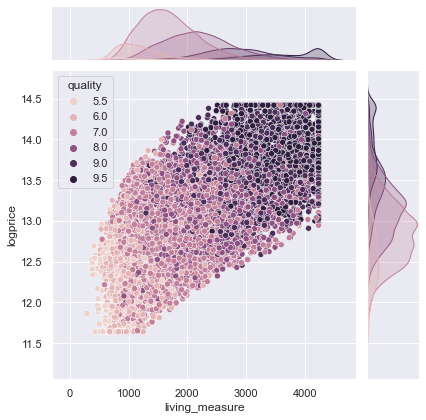

In [88]:
 sns.jointplot("living_measure", "logprice", df2, kind= 'scatter', hue = "quality")

Most of the houses rated greater than 9 are in zipcode starting 980

C:\Users\eadogla\Anaconda3\Anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


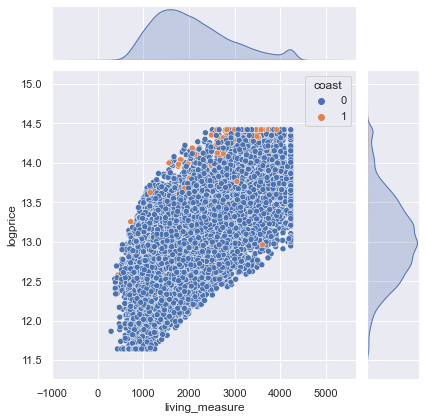

In [89]:
 sns.jointplot("living_measure", "logprice", df2, kind= 'scatter', hue = "coast")

C:\Users\eadogla\Anaconda3\Anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


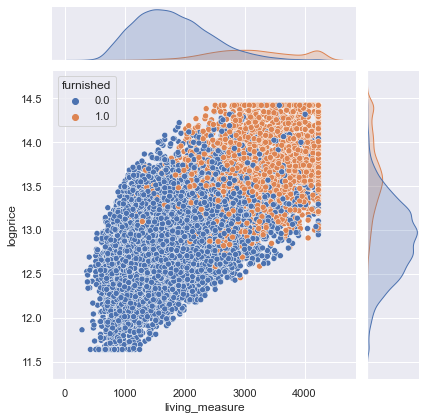

In [90]:
 sns.jointplot("living_measure", "logprice", df2, kind= 'scatter', hue = "furnished")

C:\Users\eadogla\Anaconda3\Anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


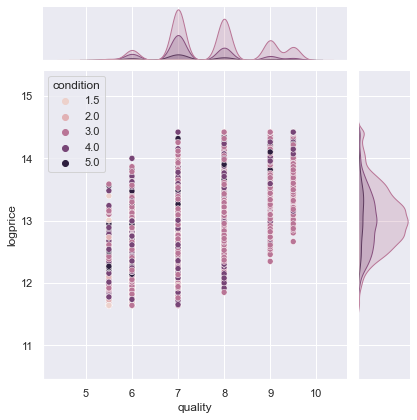

In [91]:
 sns.jointplot("quality", "logprice", df2, kind= 'scatter', hue = "condition")

C:\Users\eadogla\Anaconda3\Anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


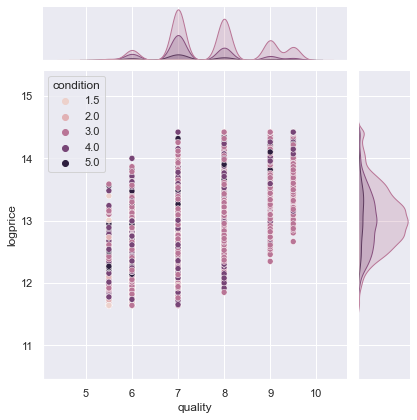

In [92]:
 sns.jointplot("quality", "logprice", df2, kind= 'scatter', hue = "condition")

C:\Users\eadogla\Anaconda3\Anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


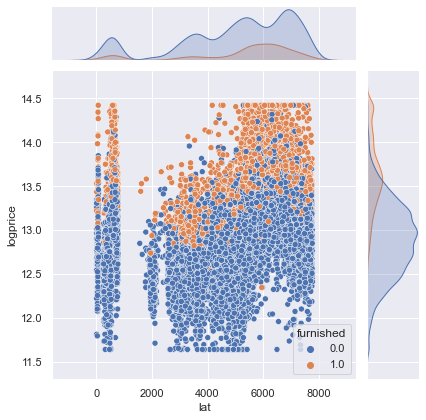

In [93]:
 sns.jointplot("lat", "logprice", df2, kind= 'scatter', hue = "furnished")

C:\Users\eadogla\Anaconda3\Anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


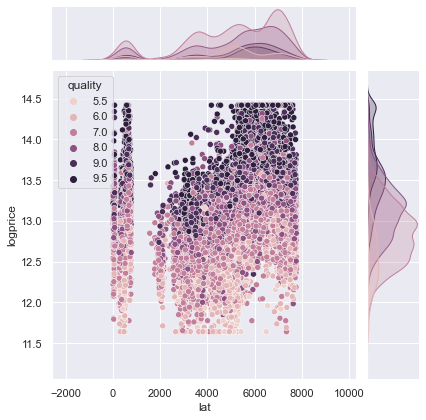

In [94]:
 sns.jointplot("lat", "logprice", df2, kind= 'scatter', hue = "quality")

C:\Users\eadogla\Anaconda3\Anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


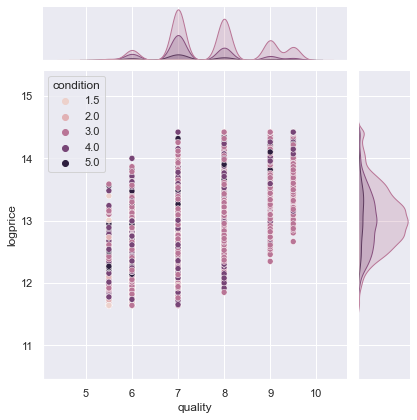

In [95]:
 sns.jointplot("quality", "logprice", df2, kind= 'scatter', hue = "condition")

In [96]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 12)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

zipcode      980   981    All
condition                    
All        12600  8948  21548
3.0         8274  5746  14020
4.0         3503  2139   5642
5.0          734   951   1685
2.0           78    93    171
1.5           11    19     30
------------


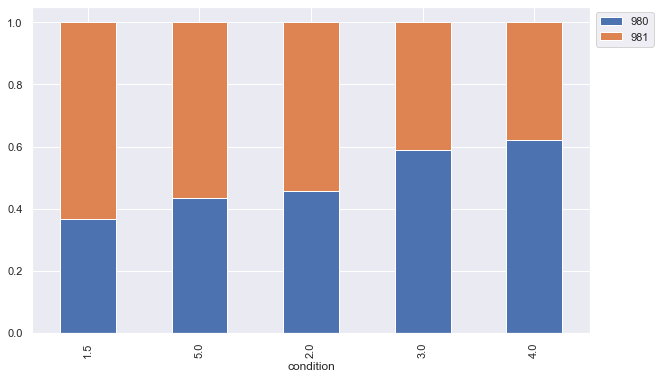

In [97]:
stacked_barplot(df2, "condition", "zipcode")

- For low condition houses, zipcode 981 has higher proportion of them

- For high condition houses, zipcode starting with 980 has a higher proportion

furnished    0.0   1.0    All
zipcode                      
All        17314  4234  21548
980         9328  3272  12600
981         7986   962   8948
------------


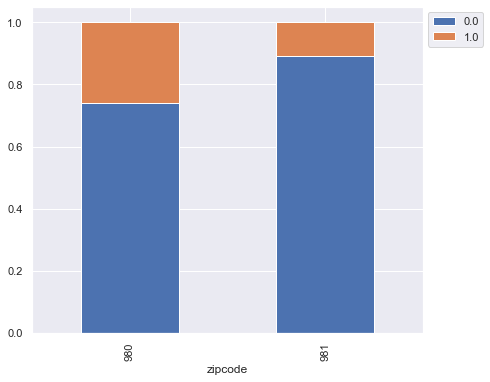

(None,)

In [98]:
stacked_barplot(df2, "zipcode", "furnished"), #Stacked barplot of houses furnished and unfurnished at two starting zipcodes

The areas with zipcode starting 980 have about 25 of houses furnished. Those with 981 have only about 10% of the houses furnished

furnished    0.0   1.0    All
sight                        
All        17314  4234  21548
0.0        16141  3298  19439
2.0          592   364    956
3.0          238   267    505
4.0          120   196    316
1.0          223   109    332
------------


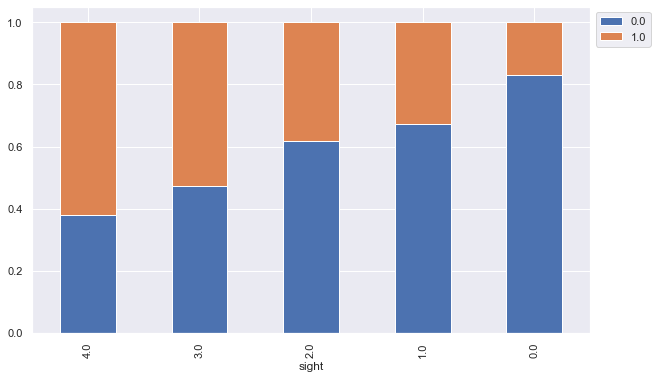

In [99]:
stacked_barplot(df2, "sight", "furnished")

- 80% of houses not sighted before purchase were unfurnished

- This number reduceds with the number of sighting

- Four houses sighted 4 times, only less than 40 were unfurnished

zipcode    980   981    All
coast                      
All      12600  8948  21548
0        12511  8876  21387
1           89    72    161
------------


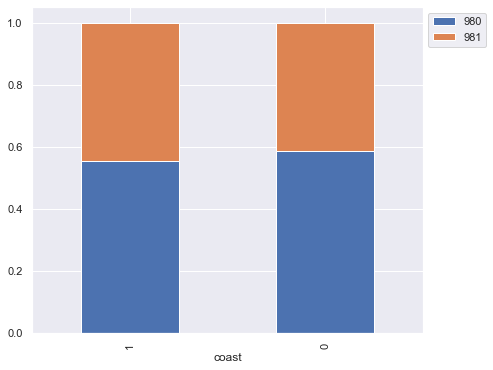

In [100]:
stacked_barplot(df2, "coast", "zipcode")

- There is slightly higher percentage of coastal houses at zipcode starting with 981 than 980



## Linear Model Building

1. We want to predict the log of price of houses.

2. Before we proceed to build a model, we'll have to encode categorical features.

3. We'll split the data into train and test to be able to evaluate the model that we build on the train data.

4. We will build a Linear Regression model using the train data and then check it's performance.

In [101]:
# defining X and y variables
X = df2.drop(["logprice"], axis=1)
y = df2["logprice"]

print(X.head())
print(y.head())

   room_bed  room_bath  living_measure  lot_measure  ceil coast sight  \
0       4.0       1.75          3050.0       9440.0   1.0     0   0.0   
1       2.0       1.00           670.0       3101.0   1.0     0   0.0   
2       4.0       2.75          3040.0       2415.0   2.0     1   4.0   
3       3.0       2.50          1740.0       3721.0   2.0     0   0.0   
4       2.0       1.00          1120.0       4590.0   1.0     0   0.0   

   condition  quality  ceil_measure  ...  zipcode     lat   long  \
0        3.0      8.0        1800.0  ...      980  7228.0  183.0   
1        4.0      6.0         670.0  ...      981  5546.0  274.0   
2        3.0      8.0        3040.0  ...      981  5188.0  256.0   
3        3.0      8.0        1740.0  ...      980  3363.0  213.0   
4        3.0      7.0        1120.0  ...      981  5663.0  285.0   

   living_measure15  lot_measure15  furnished total_area  month house_age  \
0            2020.0         8660.0        0.0    12490.0     04      49.0  

In [102]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

room_bed  room_bath  living_measure  lot_measure  ceil  condition  quality  \
0       4.0       1.75          3050.0       9440.0   1.0        3.0      8.0   
1       2.0       1.00           670.0       3101.0   1.0        4.0      6.0   
2       4.0       2.75          3040.0       2415.0   2.0        3.0      8.0   
3       3.0       2.50          1740.0       3721.0   2.0        3.0      8.0   
4       2.0       1.00          1120.0       4590.0   1.0        3.0      7.0   

   ceil_measure  basement     lat  ...  month_03  month_04  month_05  \
0        1800.0    1250.0  7228.0  ...         0         1         0   
1         670.0       0.0  5546.0  ...         1         0         0   
2        3040.0       0.0  5188.0  ...         0         0         0   
3        1740.0       0.0  3363.0  ...         0         0         0   
4        1120.0       0.0  5663.0  ...         0         0         0   

   month_06  month_07  month_08  month_09  month_10  month_11  month_12  
0         0         0         0         0         0         0         0  
1         0         0         0         0         0         0         0  
2         0         0         1         0         0         0         0  
3         0         0         0         0         1         0         0  
4         0         0         0         0         0         0         0  

[5 rows x 34 columns]

In [103]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [104]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 15083
Number of rows in test data = 6465


In [105]:
# fitting the model on the train data (70% of the whole data)
from sklearn.linear_model import LinearRegression

linearregression = LinearRegression()
linearregression.fit(x_train, y_train)

LinearRegression()

In [106]:
coef_df = pd.DataFrame(
    np.append(linearregression.coef_, linearregression.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

Coefficients
room_bed             -0.032868
room_bath             0.068591
living_measure        0.000188
lot_measure          -0.000015
ceil                  0.040152
condition             0.056646
quality               0.202966
ceil_measure         -0.000006
basement             -0.000005
lat                   0.000050
long                 -0.000031
living_measure15      0.000132
lot_measure15        -0.000006
total_area            0.000015
house_age             0.004012
renovation_age       -0.020253
coast_1               0.299871
sight_1.0             0.109682
sight_2.0             0.091869
sight_3.0             0.104831
sight_4.0             0.216835
zipcode_981           0.094793
furnished_1.0        -0.013901
month_02              0.028480
month_03              0.064801
month_04              0.086546
month_05              0.030186
month_06              0.007227
month_07              0.004917
month_08              0.016883
month_09             -0.008181
month_10             -0.003752
month_11             -0.009700
month_12             -0.001806
Intercept            10.911933

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [107]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [108]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
linearregression_train_perf = model_performance_regression(
    linearregression, x_train, y_train
)
linearregression_train_perf

Training Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.281371  0.221032   0.700356        0.699679  1.698817

**Observations**

- The training $R^2$ is 70.0%, indicating that the model explains 70% of the variation in the train data. This is not the best
- MAE and RMSE on the train and test sets are comparable, which shows that the model is not overfitting.

- MAE indicates that our current model is able to predict logprice (which can be converted to price) within a mean error of 0.22  on the test data.

- MAPE on the test set suggests we can predict within 1.7% of the logprice.

In [109]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
linearregression_test_perf = model_performance_regression(
    linearregression, x_test, y_test
)
linearregression_test_perf

Test Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.281515  0.220163   0.699667        0.698079  1.693029

- The test data is comparable to the training data, implying no overfitting in the train data

## Linear Regression using statsmodels

- Let's build a linear regression model using statsmodels.

In [110]:
# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually
x_train1 = sm.add_constant(x_train)
# adding constant to the test data
x_test1 = sm.add_constant(x_test)

olsmod0 = sm.OLS(y_train, x_train1).fit()
print(olsmod0.summary())

                            OLS Regression Results                            
Dep. Variable:               logprice   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     1034.
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        01:21:15   Log-Likelihood:                -2275.4
No. Observations:               15083   AIC:                             4621.
Df Residuals:                   15048   BIC:                             4888.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               10.9119      0.239  

**Observation**

## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [112]:
checking_vif(x_train1)

feature           VIF
0              const  10888.632985
1           room_bed      1.784494
2          room_bath      3.382541
3     living_measure     78.411361
4        lot_measure    102.367933
5               ceil      2.394984
6          condition      1.259787
7            quality      4.540355
8       ceil_measure     68.115300
9           basement     19.337072
10               lat      1.076020
11              long      1.115272
12  living_measure15      3.112416
13     lot_measure15      6.097068
14        total_area    112.677988
15         house_age      2.488059
16    renovation_age      2.286239
17           coast_1      1.497023
18         sight_1.0      1.033328
19         sight_2.0      1.071585
20         sight_3.0      1.085488
21         sight_4.0      1.554001
22       zipcode_981      2.033645
23     furnished_1.0      2.941952
24          month_02      2.135019
25          month_03      2.657712
26          month_04      2.962044
27          month_05      3.445220
28          month_06      3.473643
29          month_07      3.541019
30          month_08      3.179320
31          month_09      3.117664
32          month_10      3.158380
33          month_11      2.653555
34          month_12      2.742412

### Removing Multicollinearity

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [113]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [114]:
col_list = [
    "living_measure",
    "lot_measure",
    "ceil_measure",
    "basement", "lot_measure15", "total_area"
]

res = treating_multicollinearity(x_train1, y_train, col_list)
res

col  Adj. R-squared after_dropping col  RMSE after dropping col
0        basement                           0.699698                 0.281689
1    ceil_measure                           0.699697                 0.281689
2      total_area                           0.699480                 0.281791
3   lot_measure15                           0.699199                 0.281923
4     lot_measure                           0.698905                 0.282061
5  living_measure                           0.689094                 0.286619

* Dropping *living_measure* would have the maximum impact on the predictive power of the model (amongst the variables being considered).
* We'll drop *basement* and check the VIF again.

In [115]:
col_to_drop = "basement"
x_train2 = x_train1.loc[:, ~x_train1.columns.str.startswith(col_to_drop)]
x_test2 = x_test1.loc[:, ~x_test1.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  basement


feature           VIF
0              const  10888.572113
1           room_bed      1.778702
2          room_bath      3.377510
3     living_measure     10.504693
4        lot_measure    100.755723
5               ceil      2.394899
6          condition      1.259787
7            quality      4.539320
8       ceil_measure      6.958951
9                lat      1.076020
10              long      1.114968
11  living_measure15      3.112390
12     lot_measure15      6.095961
13        total_area    110.862166
14         house_age      2.486116
15    renovation_age      2.286149
16           coast_1      1.496075
17         sight_1.0      1.032193
18         sight_2.0      1.069841
19         sight_3.0      1.083668
20         sight_4.0      1.550311
21       zipcode_981      2.033320
22     furnished_1.0      2.941806
23          month_02      2.134980
24          month_03      2.657648
25          month_04      2.962033
26          month_05      3.445141
27          month_06      3.473643
28          month_07      3.541002
29          month_08      3.179312
30          month_09      3.117551
31          month_10      3.158334
32          month_11      2.653555
33          month_12      2.742345

In [116]:
col_list = [
     "living_measure",
    "lot_measure",
    "ceil_measure",
    "lot_measure15", "total_area"
]

res = treating_multicollinearity(x_train2, y_train, col_list)
res

col  Adj. R-squared after_dropping col  RMSE after dropping col
0    ceil_measure                           0.699717                 0.281680
1      total_area                           0.699499                 0.281782
2   lot_measure15                           0.699218                 0.281914
3     lot_measure                           0.698922                 0.282053
4  living_measure                           0.678388                 0.291512

- We will drop ceil_measure

In [117]:
col_to_drop = "ceil_measure"
x_train3 = x_train2.loc[:, ~x_train2.columns.str.startswith(col_to_drop)]
x_test3 = x_test2.loc[:, ~x_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  ceil_measure


feature           VIF
0              const  10884.748738
1           room_bed      1.778588
2          room_bath      3.305571
3     living_measure      7.146454
4        lot_measure    100.621014
5               ceil      1.824731
6          condition      1.248457
7            quality      4.539129
8                lat      1.074118
9               long      1.114939
10  living_measure15      3.078877
11     lot_measure15      6.093774
12        total_area    110.792870
13         house_age      2.486112
14    renovation_age      2.285042
15           coast_1      1.495842
16         sight_1.0      1.028893
17         sight_2.0      1.064728
18         sight_3.0      1.074528
19         sight_4.0      1.542749
20       zipcode_981      1.952309
21     furnished_1.0      2.878020
22          month_02      2.134321
23          month_03      2.657170
24          month_04      2.961551
25          month_05      3.444843
26          month_06      3.473530
27          month_07      3.541000
28          month_08      3.179312
29          month_09      3.117540
30          month_10      3.158233
31          month_11      2.653554
32          month_12      2.742270

In [118]:
col_list = [
         "lot_measure",
    "lot_measure15", "total_area","living_measure"
]

res = treating_multicollinearity(x_train3, y_train, col_list)
res

col  Adj. R-squared after_dropping col  RMSE after dropping col
0      total_area                           0.699517                 0.281774
1   lot_measure15                           0.699236                 0.281906
2     lot_measure                           0.698937                 0.282046
3  living_measure                           0.669630                 0.295455

- We will drop total_area

In [119]:
col_to_drop = "total_area"  
x_train4 = x_train3.loc[:, ~x_train3.columns.str.startswith(col_to_drop)]
x_test4 = x_test3.loc[:, ~x_test3.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train4)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  total_area


feature           VIF
0              const  10880.418483
1           room_bed      1.778302
2          room_bath      3.304552
3     living_measure      5.273102
4        lot_measure      5.975500
5               ceil      1.822484
6          condition      1.248378
7            quality      4.534300
8                lat      1.074087
9               long      1.113882
10  living_measure15      3.074662
11     lot_measure15      6.063573
12         house_age      2.486062
13    renovation_age      2.284503
14           coast_1      1.495819
15         sight_1.0      1.028411
16         sight_2.0      1.063731
17         sight_3.0      1.074426
18         sight_4.0      1.542671
19       zipcode_981      1.950877
20     furnished_1.0      2.877369
21          month_02      2.134275
22          month_03      2.657158
23          month_04      2.961455
24          month_05      3.444839
25          month_06      3.473515
26          month_07      3.540950
27          month_08      3.179273
28          month_09      3.117486
29          month_10      3.158226
30          month_11      2.653513
31          month_12      2.742236

In [120]:
col_list = ["living_measure", "lot_measure", "lot_measure15"
         
]

res = treating_multicollinearity(x_train3, y_train, col_list)
res

col  Adj. R-squared after_dropping col  RMSE after dropping col
0   lot_measure15                           0.699236                 0.281906
1     lot_measure                           0.698937                 0.282046
2  living_measure                           0.669630                 0.295455

In [121]:
col_to_drop = "lot_measure15"
x_train5 = x_train4.loc[:, ~x_train4.columns.str.startswith(col_to_drop)]
x_test5 = x_test4.loc[:, ~x_test4.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train5)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  lot_measure15


feature           VIF
0              const  10867.037487
1           room_bed      1.778251
2          room_bath      3.298463
3     living_measure      5.272664
4        lot_measure      1.650799
5               ceil      1.807879
6          condition      1.245025
7            quality      4.534270
8                lat      1.074040
9               long      1.112547
10  living_measure15      3.043073
11         house_age      2.481138
12    renovation_age      2.283017
13           coast_1      1.492258
14         sight_1.0      1.028142
15         sight_2.0      1.063673
16         sight_3.0      1.074417
17         sight_4.0      1.542671
18       zipcode_981      1.932974
19     furnished_1.0      2.874108
20          month_02      2.134267
21          month_03      2.657139
22          month_04      2.961333
23          month_05      3.444823
24          month_06      3.473477
25          month_07      3.540337
26          month_08      3.178874
27          month_09      3.117214
28          month_10      3.158001
29          month_11      2.652682
30          month_12      2.741682

In [122]:
col_list = ["living_measure"]
         


res = treating_multicollinearity(x_train5, y_train, col_list)
res

col  Adj. R-squared after_dropping col  RMSE after dropping col
0  living_measure                           0.656045                 0.301468

In [123]:
col_to_drop = "living_measure"
x_train6 = x_train5.loc[:, ~x_train5.columns.str.startswith(col_to_drop)]
x_test6 = x_test5.loc[:, ~x_test5.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train6)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  living_measure


feature           VIF
0            const  10779.880398
1         room_bed      1.493063
2        room_bath      2.661444
3      lot_measure      1.508029
4             ceil      1.804666
5        condition      1.238593
6          quality      4.018332
7              lat      1.070900
8             long      1.109201
9        house_age      2.422876
10  renovation_age      2.274065
11         coast_1      1.491558
12       sight_1.0      1.019901
13       sight_2.0      1.050467
14       sight_3.0      1.062218
15       sight_4.0      1.528266
16     zipcode_981      1.836499
17   furnished_1.0      2.761618
18        month_02      2.134073
19        month_03      2.656629
20        month_04      2.960086
21        month_05      3.441877
22        month_06      3.466165
23        month_07      3.532445
24        month_08      3.175208
25        month_09      3.113771
26        month_10      3.152765
27        month_11      2.650655
28        month_12      2.738564

**The above predictors have no multicollinearity and the assumption is satisfied.**

Let's check the model performance.

In [124]:
olsmod1 = sm.OLS(y_train, x_train6).fit()
print(olsmod1.summary())

                            OLS Regression Results                            
Dep. Variable:               logprice   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     1028.
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        01:21:20   Log-Likelihood:                -3301.5
No. Observations:               15083   AIC:                             6661.
Df Residuals:                   15054   BIC:                             6882.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.9018      0.255     38.

In [125]:
# initial list of columns
cols = x_train6.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train6[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'room_bed', 'room_bath', 'lot_measure', 'ceil', 'condition', 'quality', 'lat', 'long', 'house_age', 'coast_1', 'sight_1.0', 'sight_2.0', 'sight_3.0', 'sight_4.0', 'zipcode_981', 'furnished_1.0', 'month_03', 'month_04', 'month_05', 'month_07', 'month_08']


In [126]:
x_train6 = x_train5[selected_features]
x_test6 = x_test5[selected_features]

In [127]:
olsmod2 = sm.OLS(y_train, x_train6).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:               logprice   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     1371.
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        01:21:20   Log-Likelihood:                -3305.5
No. Observations:               15083   AIC:                             6655.
Df Residuals:                   15061   BIC:                             6823.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.6687      0.037    261.125

**Observations**

- The  R-squared is 0.657 and adj R square is 0.656; that's very close
- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance
- 



The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

### TEST FOR LINEARITY AND INDEPENDENCE

**Why the test?**

* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.
* The independence of the error terms (or residuals) is important. If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant.

**How to check linearity and independence?**

- Make a plot of fitted values vs residuals.
- If they don't follow any pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear.

In [128]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head(10)

Actual Values  Fitted Values  Residuals
148        12.357088      12.686241  -0.329152
6687       12.983101      12.851928   0.131173
7804       12.959844      12.686666   0.273178
8696       12.691580      12.849383  -0.157803
7133       12.323856      12.030367   0.293489
12439      13.035497      13.571691  -0.536194
6418       12.771386      13.118159  -0.346772
1357       12.988832      12.992292  -0.003460
21251      13.265598      12.680012   0.585586
8267       13.171154      12.812653   0.358500

- The actual and predicted values are comparable

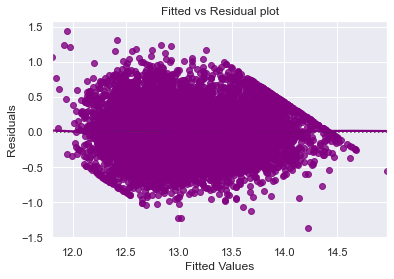

In [129]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

- There exist no pattern, which means there is a linear relationship in the attributes and logprice

- 



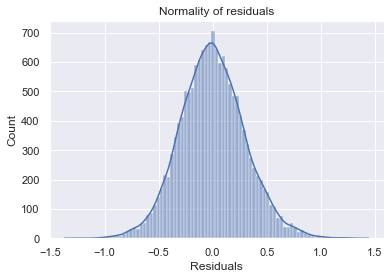

In [130]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

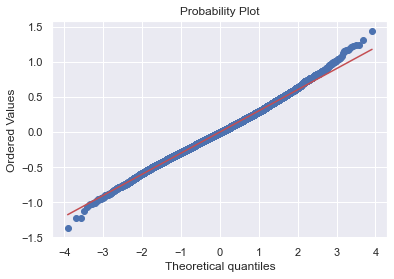

In [131]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [132]:
stats.shapiro(df_pred["Residuals"]);

C:\Users\eadogla\Anaconda3\Anaconda1\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

In [133]:
# predictions on the test set
pred = olsmod2.predict(x_test6)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

Actual  Predicted
16472  12.971540  12.851357
2118   12.860999  12.859185
18939  12.821258  12.854674
18062  12.983101  13.179958
8304   12.881565  12.935961
3428   13.647092  13.497250
7443   13.410545  13.078981
15304  13.180632  13.087140
4269   13.279367  12.939576
11307  13.693343  13.223619

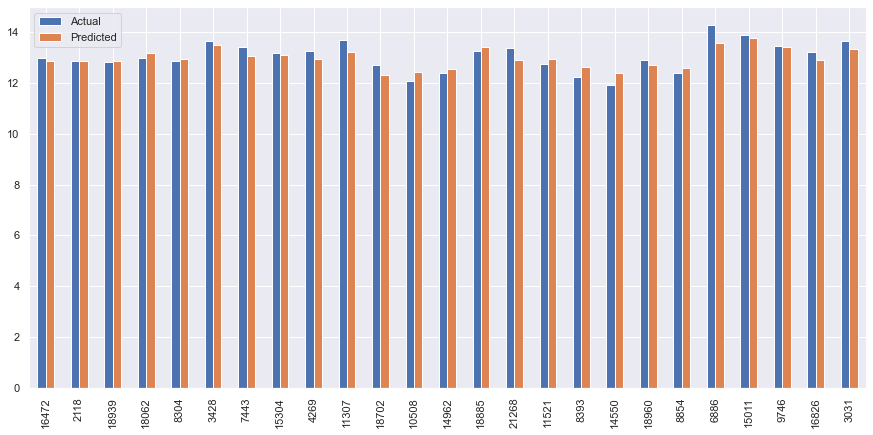

In [134]:
df1 = df_pred_test.sample(25, random_state=1)
df1.plot(kind="bar", figsize=(15, 7))
plt.show()

In [135]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train6, y_train)
olsmod2_train_perf

Training Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.301258  0.236241   0.656501        0.655999  1.815106

In [136]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test6, y_test)
olsmod2_test_perf

Test Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.300867  0.235476   0.656958        0.655786  1.810472

In [137]:
# training performance comparison

models_train_comp_df = pd.concat(
    [linearregression_train_perf.T, olsmod2_train_perf.T], axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Linear Regression sklearn  Linear Regression statsmodels
RMSE                             0.281371                       0.301258
MAE                              0.221032                       0.236241
R-squared                        0.700356                       0.656501
Adj. R-squared                   0.699679                       0.655999
MAPE                             1.698817                       1.815106

In [138]:
# test performance comparison

models_test_comp_df = pd.concat(
    [linearregression_test_perf.T, olsmod2_test_perf.T], axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


Linear Regression sklearn  Linear Regression statsmodels
RMSE                             0.281515                       0.300867
MAE                              0.220163                       0.235476
R-squared                        0.699667                       0.656958
Adj. R-squared                   0.698079                       0.655786
MAPE                             1.693029                       1.810472

In [139]:
olsmodel_final = sm.OLS(y_train, x_train6).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:               logprice   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     1371.
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        01:21:59   Log-Likelihood:                -3305.5
No. Observations:               15083   AIC:                             6655.
Df Residuals:                   15061   BIC:                             6823.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.6687      0.037    261.125

***Conclusion***
- The 65% accuracy is not the best, we need to explore other models - Ridge and Lasso
- From the coefficients, it can be observed that, the house price decrease with increasing long (longitude) and increasing lat (latitude) 
- The number of times a house is sighted has a positive correlation with prices
- People are likely to sight furnished houses before buying that unfurnished houses
- The months of March and April have the highest correlation with house price in the year. This implies house prices have an upward tick in those months
- Houses at zipcodes starting with 981 are slightly more expensive than 980.
- The number of room_bath (bathrooms per bedroom) has positive correlation with prices
- A unit increase in quality of the building will result in 27.8% increase in the home prize





### Builing Alternative Models

In [140]:
# from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor
    )
from xgboost import XGBRegressor
from math import sqrt


In [141]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [142]:
model = RandomForestRegressor(random_state=1)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=1)

In [143]:
model.score(x_train, y_train)

0.9812566573649877

In [144]:
model.score(x_test, y_test)

0.865013876206897

### Random Forest

**On train data**

In [145]:
reg = RandomForestRegressor(criterion='mse')
reg.fit(x_train,y_train)
modelPred = reg.predict(x_train)
print(modelPred)

print("Number of predictions:",len(modelPred))

meanSquaredError=mean_squared_error(y_train, modelPred)
print("MSE:", meanSquaredError)
rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)
MeanAbsoluteError =mean_absolute_error(y_train, modelPred)
print("MAE:", MeanAbsoluteError)
score2 = r2_score(y_train, modelPred)
print("R-squared:", score2)


[12.40482375 12.96910744 12.97455909 ... 12.90857449 14.09263489
 14.38921068]
Number of predictions: 15083
MSE: 0.004881796149768241
RMSE: 0.06986985150813076
MAE: 0.049778348062221985
R-squared: 0.9815231919579085


In [146]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [147]:
reg = RandomForestRegressor(criterion='mse')
reg.fit(x_train,y_train)
modelPred = reg.predict(x_train)
print(modelPred)

print("Number of predictions:",len(modelPred))

meanSquaredError=mean_squared_error(y_train, modelPred)
print("MSE:", meanSquaredError)
rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)
MeanAbsoluteError =mean_absolute_error(y_train, modelPred)
print("MAE:", MeanAbsoluteError)
score2 = r2_score(y_train, modelPred)
print("R-squared:", score2)

[12.42942739 12.99089541 12.97452487 ... 12.91031611 14.08622292
 14.40700752]
Number of predictions: 15083
MSE: 0.004998497291885089
RMSE: 0.07070005156918267
MAE: 0.05017643626914219
R-squared: 0.9810814970294367


**On test**

In [148]:
model = RandomForestRegressor(random_state=1)
model.fit(x_test, y_test)

RandomForestRegressor(random_state=1)

In [149]:
reg = RandomForestRegressor(criterion='mse')
reg.fit(x_test,y_test)
modelPred1 = reg.predict(x_test)
print(modelPred1)

print("Number of predictions:",len(modelPred1))
meanSquaredError=mean_squared_error(y_test, modelPred1)
print("MSE:", meanSquaredError)
rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)
MeanAbsoluteError =mean_absolute_error(y_test, modelPred1)
print("MAE:", MeanAbsoluteError)
score2 = r2_score(y_test, modelPred1)
print("R-squared:", score2)


[12.51995582 12.88907599 13.13981931 ... 12.90553474 13.14832238
 13.96110469]
Number of predictions: 6465
MSE: 0.005395172321326374
RMSE: 0.07345183674576405
MAE: 0.052306370944490393
R-squared: 0.9795542059611513


- Model score looks good. Model can predict ~98% of price


- No overfitting observed

### Decision Tree
**On train data**

In [151]:
DecisionTree = DecisionTreeRegressor(criterion='mse')
DecisionTree.fit(x_train,y_train)
modelPred = DecisionTree.predict(x_train)
print(modelPred)

print("Number of predictions:",len(modelPred))

meanSquaredError=mean_squared_error(y_train, modelPred)
print("MSE:", meanSquaredError)
rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)
MeanAbsoluteError =mean_absolute_error(y_train, modelPred)
print("MAE:", MeanAbsoluteError)
score2 = r2_score(y_train, modelPred)
print("R-squared:", score2)


[12.35708842 12.98310131 12.95984445 ... 12.9456262  14.28551419
 14.41911199]
Number of predictions: 15083
MSE: 2.104744664790058e-09
RMSE: 4.5877496278568406e-05
MAE: 5.282881157187609e-07
R-squared: 0.9999999920338822


In [152]:
rt = DecisionTreeRegressor(criterion = 'mse', max_depth=5)

In [153]:
rt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [154]:
param_grid = {
    'max_depth':[2,4,8,10,None],
    'criterion':['MSE','RMSE','MAE', 'R-squared'],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0]
}

In [155]:
reg = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid)

In [156]:
reg = RandomForestRegressor(criterion='mse')
reg.fit(x_test,y_test)
modelPred1 = reg.predict(x_test)
print(modelPred1)

print("Number of predictions:",len(modelPred1))
meanSquaredError=mean_squared_error(y_test, modelPred1)
print("MSE:", meanSquaredError)
rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)
MeanAbsoluteError =mean_absolute_error(y_test, modelPred1)
print("MAE:", MeanAbsoluteError)
score2 = r2_score(y_test, modelPred1)
print("R-squared:", score2)

[12.50721462 12.89566132 13.15416999 ... 12.90215579 13.16025439
 13.96189147]
Number of predictions: 6465
MSE: 0.00549503345992235
RMSE: 0.07412849290200328
MAE: 0.052865895155203596
R-squared: 0.9791757675813154


**On test data**

In [157]:
DecisionTree = DecisionTreeRegressor(criterion='mse')
DecisionTree.fit(x_test,y_test)
modelPred1 = DecisionTree.predict(x_test)
print(modelPred1)

print("Number of predictions:",len(modelPred1))
meanSquaredError=mean_squared_error(y_test, modelPred1)
print("MSE:", meanSquaredError)
rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)
MeanAbsoluteError =mean_absolute_error(y_test, modelPred1)
print("MAE:", MeanAbsoluteError)
score2 = r2_score(y_test, modelPred1)
print("R-squared:", score2)

[12.48729641 12.88664104 13.36922346 ... 12.91164235 13.16590168
 13.99783211]
Number of predictions: 6465
MSE: 1.1128246644417057e-31
RMSE: 3.3359026731031974e-16
MAE: 2.1431683445200237e-17
R-squared: 1.0


- Model can predict house prices with ~100 accuracy


## XGBoost

**On train data**

In [158]:
XGB =  XGBRegressor(criterion='mse')
XGB.fit(x_train,y_train)
modelPred = XGB.predict(x_train)
print(modelPred)

print("Number of predictions:",len(modelPred))

meanSquaredError=mean_squared_error(y_train, modelPred)
print("MSE:", meanSquaredError)
rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)
MeanAbsoluteError =mean_absolute_error(y_train, modelPred)
print("MAE:", MeanAbsoluteError)
score2 = r2_score(y_train, modelPred)
print("R-squared:", score2)


[01:27:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12.446492 12.867141 12.84478  ... 12.904036 14.038291 14.464206]
Number of predictions: 15083
MSE: 0.011945975877843965
RMSE: 0.10929764808926112
MAE: 0.08090316651009587
R-squared: 0.9547864154096527


**On test data**

In [159]:
XGB =  XGBRegressor(criterion='mse')
XGB.fit(x_test,y_test)
modelPred1 = XGB.predict(x_test)
print(modelPred1)

print("Number of predictions:",len(modelPred1))
meanSquaredError=mean_squared_error(y_test, modelPred1)
print("MSE:", meanSquaredError)
rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)
MeanAbsoluteError =mean_absolute_error(y_test, modelPred1)
print("MAE:", MeanAbsoluteError)
score2 = r2_score(y_test, modelPred1)
print("R-squared:", score2)

[01:27:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12.516713 12.858587 12.767736 ... 12.933366 13.148499 14.011458]
Number of predictions: 6465
MSE: 0.006747291388107428
RMSE: 0.08214189788474228
MAE: 0.05989277834893831
R-squared: 0.974430153139682


- R-squared on test data is greater than on train set

- Model can predict within 5% of house prices

We will cross check the model scores for XGB

In [160]:
model = XGBRegressor(random_state=1)
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=1, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [161]:
model.score(x_train, y_train)  # Checking the train score

0.9547864154096527

In [162]:
model.score(x_test, y_test)  # Checking the test score

0.8800649215011859

- The models is overfitting

## Ridge and Lasso

In [163]:
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score


**Ridgen on train set**

In [164]:
ridge = Ridge(alpha=.1)
ridge.fit(x_train,y_train)
print ("Ridge model:", (ridge.coef_))
    

Ridge model: [-3.28710283e-02  6.85906706e-02  1.88450376e-04 -1.49892532e-05
  4.01555750e-02  5.66456287e-02  2.02960731e-01 -6.48013468e-06
 -4.74938288e-06  4.95396500e-05 -3.10020004e-05  1.32352226e-04
 -6.47609412e-06  1.48712814e-05  4.01161355e-03 -2.02558638e-02
  2.99593676e-01  1.09625586e-01  9.18474606e-02  1.04801444e-01
  2.16830674e-01  9.47924939e-02 -1.38921264e-02  2.84439749e-02
  6.47631646e-02  8.65087880e-02  3.01491307e-02  7.19120923e-03
  4.88116235e-03  1.68469717e-02 -8.21471556e-03 -3.78602534e-03
 -9.73194035e-03 -1.84060905e-03]


In [165]:
modelPred = ridge.predict(x_train)
print(modelPred)

print("Number of predictions:",len(modelPred))

meanSquaredError=mean_squared_error(y_train, modelPred)
print("MSE:", meanSquaredError)
rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)
MeanAbsoluteError =mean_absolute_error(y_train, modelPred)
print("MAE:", MeanAbsoluteError)
score2 = r2_score(y_train, modelPred)
print("R-squared:", score2)


[12.74064427 12.83852916 12.71996899 ... 12.96228151 13.47558769
 14.36893839]
Number of predictions: 15083
MSE: 0.07916968182496573
RMSE: 0.28137107496145675
MAE: 0.2210321854217455
R-squared: 0.7003555722205249


**Ridge on test set**

In [166]:
ridge = Ridge(alpha=.1)
ridge.fit(x_test,y_test)
print ("Ridge model:", (ridge.coef_))
    

Ridge model: [-3.22718823e-02  7.24833351e-02  1.60320837e-04 -3.27714735e-05
  4.89828190e-02  5.92605738e-02  2.00127351e-01 -1.01290745e-05
  2.91335916e-07  5.01649023e-05 -1.76700088e-05  1.47950549e-04
 -1.19625863e-06  2.82089546e-05  4.16070000e-03 -2.01479260e-02
  3.82245413e-01  1.53401037e-01  4.69767801e-02  1.31527396e-01
  1.22804738e-01  8.82006478e-02 -6.98536966e-04  3.58075900e-03
  5.22492568e-02  7.64543173e-02  4.14810506e-04 -1.61133805e-02
 -1.03735671e-02 -2.91999139e-02 -1.42795610e-02 -1.03711571e-02
 -2.25377270e-02 -5.24278043e-02]


In [167]:
modelPred = ridge.predict(x_test)
print(modelPred)

print("Number of predictions:",len(modelPred))

meanSquaredError=mean_squared_error(y_test, modelPred)
print("MSE:", meanSquaredError)
rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)
MeanAbsoluteError =mean_absolute_error(y_test, modelPred)
print("MAE:", MeanAbsoluteError)
score2 = r2_score(y_test, modelPred)
print("R-squared:", score2)

[12.61448507 12.69763022 12.62225068 ... 12.77522765 13.18622413
 13.70986856]
Number of predictions: 6465
MSE: 0.07857386726569728
RMSE: 0.28031030531483725
MAE: 0.2192378487245761
R-squared: 0.702232846094649


- The accuracy of prediction on Ridge is not better than Decision Tree, Random Forest or XGBoost

**Lasso on train set**

In [168]:
lasso = Lasso(alpha=.1)
lasso.fit(x_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [-0.00000000e+00  0.00000000e+00  2.56653943e-04 -1.09413830e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.02696248e-04
  8.02940139e-05  5.88108340e-05  6.46955716e-05  2.17521655e-04
 -8.36793671e-06  4.25365388e-06  2.97855990e-03 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00]


In [169]:
modelPred = lasso.predict(x_train)
print(modelPred)

print("Number of predictions:",len(modelPred))

meanSquaredError=mean_squared_error(y_train, modelPred)
print("MSE:", meanSquaredError)
rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)
MeanAbsoluteError =mean_absolute_error(y_train, modelPred)
print("MAE:", MeanAbsoluteError)
score2 = r2_score(y_train, modelPred)
print("R-squared:", score2)


[12.79168258 12.90638014 12.82143015 ... 13.00536661 13.1875569
 14.29866973]
Number of predictions: 15083
MSE: 0.10474027256387433
RMSE: 0.32363601864420827
MAE: 0.25833528872749245
R-squared: 0.603575026267551


**Lasso on test set**

In [170]:
lasso = Lasso(alpha=.1)
lasso.fit(x_test,y_test)
print ("Ridge model:", (lasso.coef_))

Ridge model: [-0.00000000e+00  0.00000000e+00  2.49817177e-04 -2.77183272e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  7.49911387e-05
  5.95666249e-05  6.01451996e-05  6.30800128e-05  2.39500916e-04
 -5.64163212e-06  1.85316303e-05  3.02958229e-03 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00]


C:\Users\eadogla\Anaconda3\Anaconda1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.29902207159966565, tolerance: 0.17059640232656442
  model = cd_fast.enet_coordinate_descent(


In [171]:
modelPred = lasso.predict(x_test)
print(modelPred1)

print("Number of predictions:",len(modelPred1))

meanSquaredError=mean_squared_error(y_test, modelPred1)
print("MSE:", meanSquaredError)
rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)
MeanAbsoluteError =mean_absolute_error(y_test, modelPred1)
print("MAE:", MeanAbsoluteError)
score2 = r2_score(y_test, modelPred1)
print("R-squared:", score2)


[12.516713 12.858587 12.767736 ... 12.933366 13.148499 14.011458]
Number of predictions: 6465
MSE: 0.006747291388107428
RMSE: 0.08214189788474228
MAE: 0.05989277834893831
R-squared: 0.974430153139682


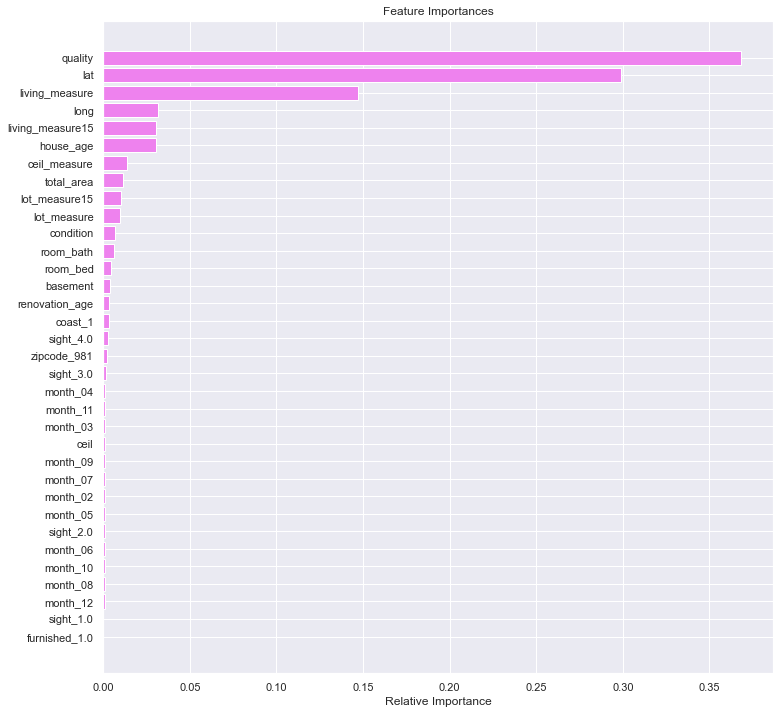

In [172]:
feature_names = x_train.columns
importances = DecisionTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Conclusion

- The best model for predicting the house prices is the Decision Tree

- It explains ~100% of the variation in the data and can predict within less than 1% of the actual price.


- The most significant predictors of house prices are quality, latitute and living_measure.


- The quality rating alone accounts for ~36% of the price variations, and the higher the rating in the range (5-9), the higher the price.

- House prices increased generally with increasing latitude, and accounted for nearly 30% of price variations.

- The living measure or the square footage also accounted for 15% of the variation in the house prices.

- The houses in the coastal areas account for only 0.7% of the houses but have average prices higher than the houses in the noncoastal areas. 




In [172]:
import pickle
with open('house_prices','wb') as f:
    pickle.dump(DecisionTree, f)

In [174]:
import pandas as pd

import folium


In [175]:
#Create a map object

In [176]:
#Create a map object
my_map = folium.Map(location = [47.6061, -121.3321], zoom_start = 8)
my_map